In [9]:
from object_detection_model import ObjectDetectionModel
from inpainting.inpaint import Inpainting
from util import resize
from util import load_image_into_numpy_array

import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [10]:
object_detection = ObjectDetectionModel()
inpainting = Inpainting()

In [14]:
import sys, importlib
from quick_draw_dataset import QuickDrawDataset
importlib.reload(sys.modules['quick_draw_dataset'])
from quick_draw_dataset import QuickDrawDataset
qd_dataset = QuickDrawDataset()
import cv2

Evaluating :  IMG_2531.jpeg


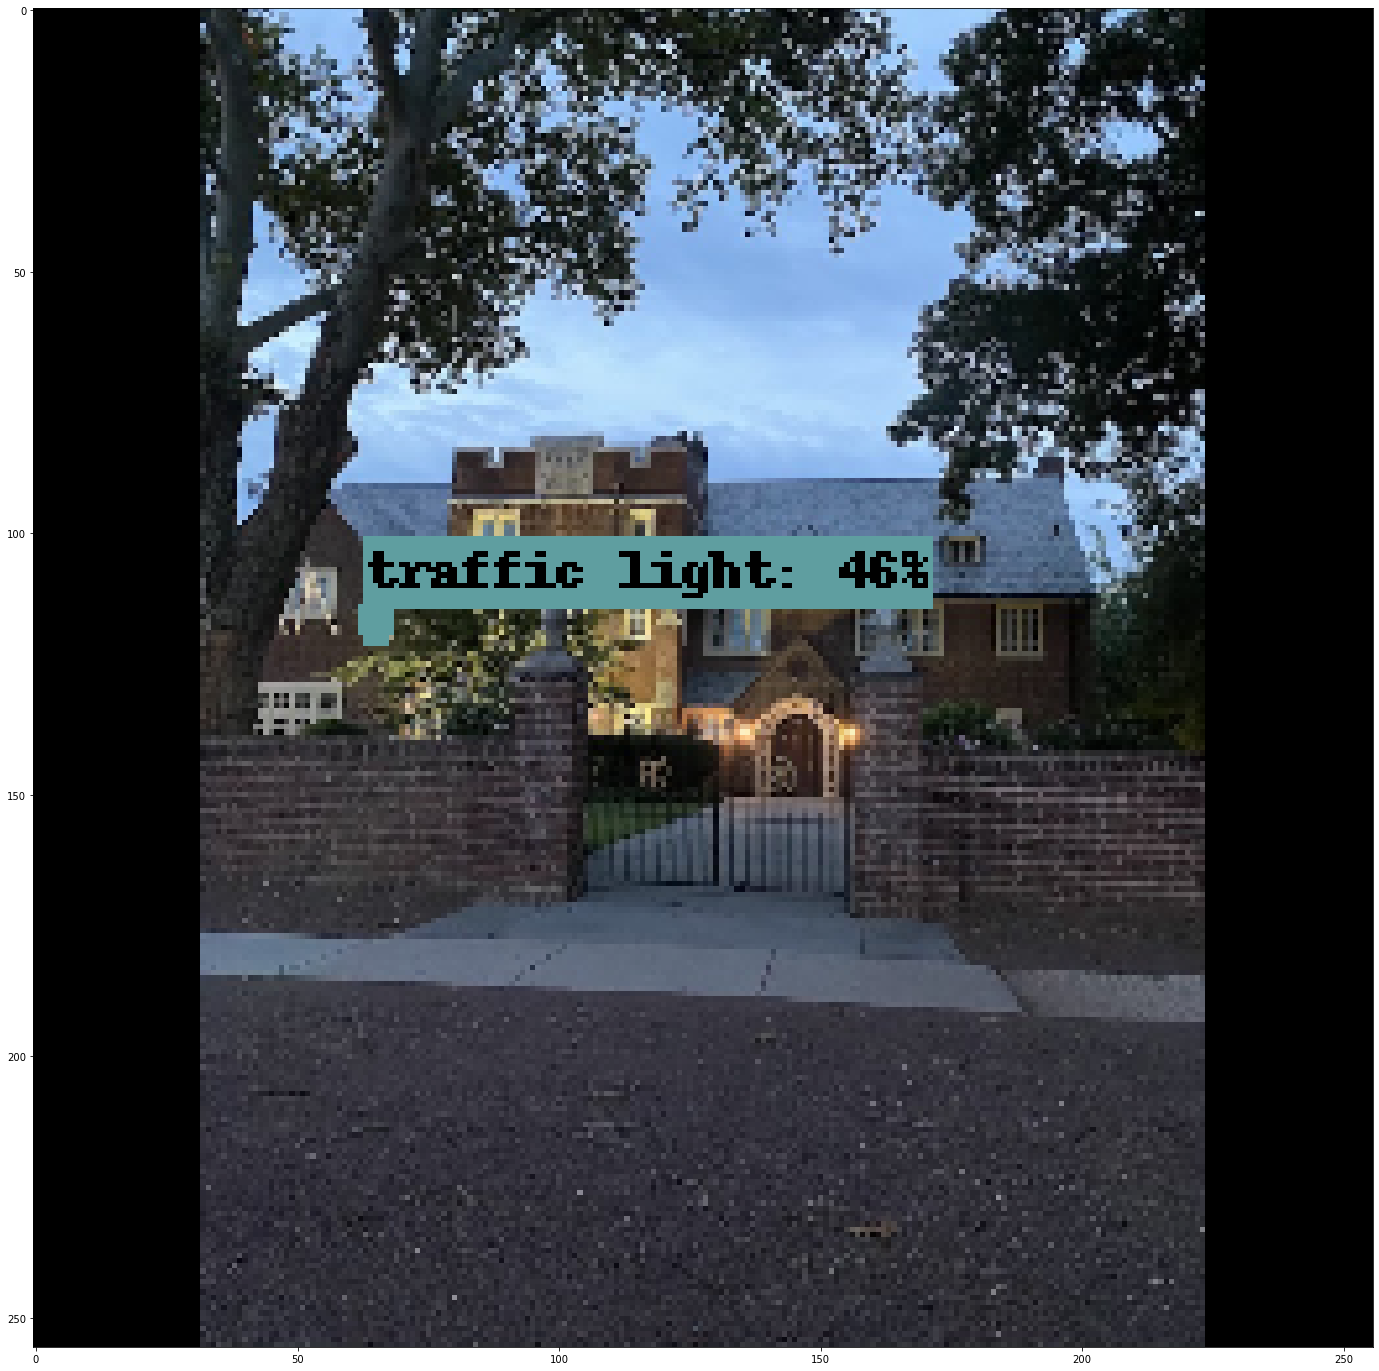

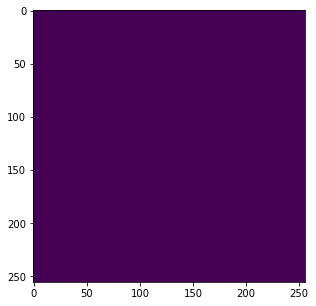

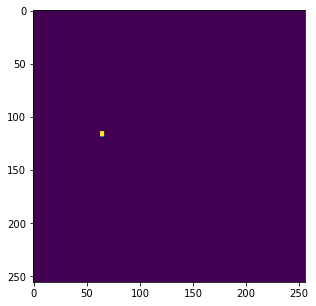

Inpainting...


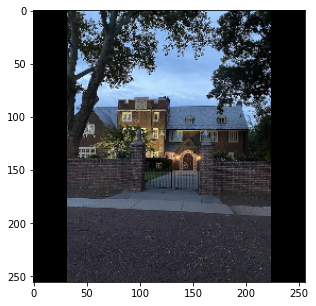

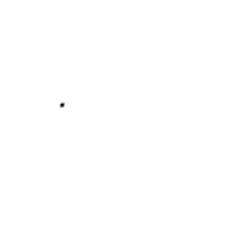

loading traffic light drawings
load complete


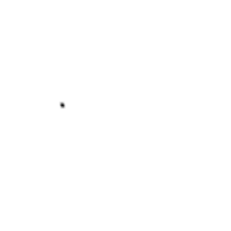

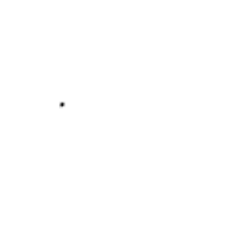

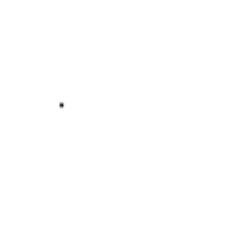

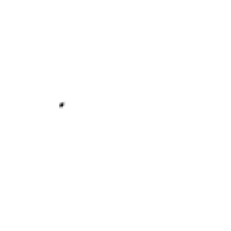

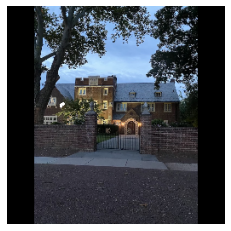

Evaluating :  IMG_2629.JPG


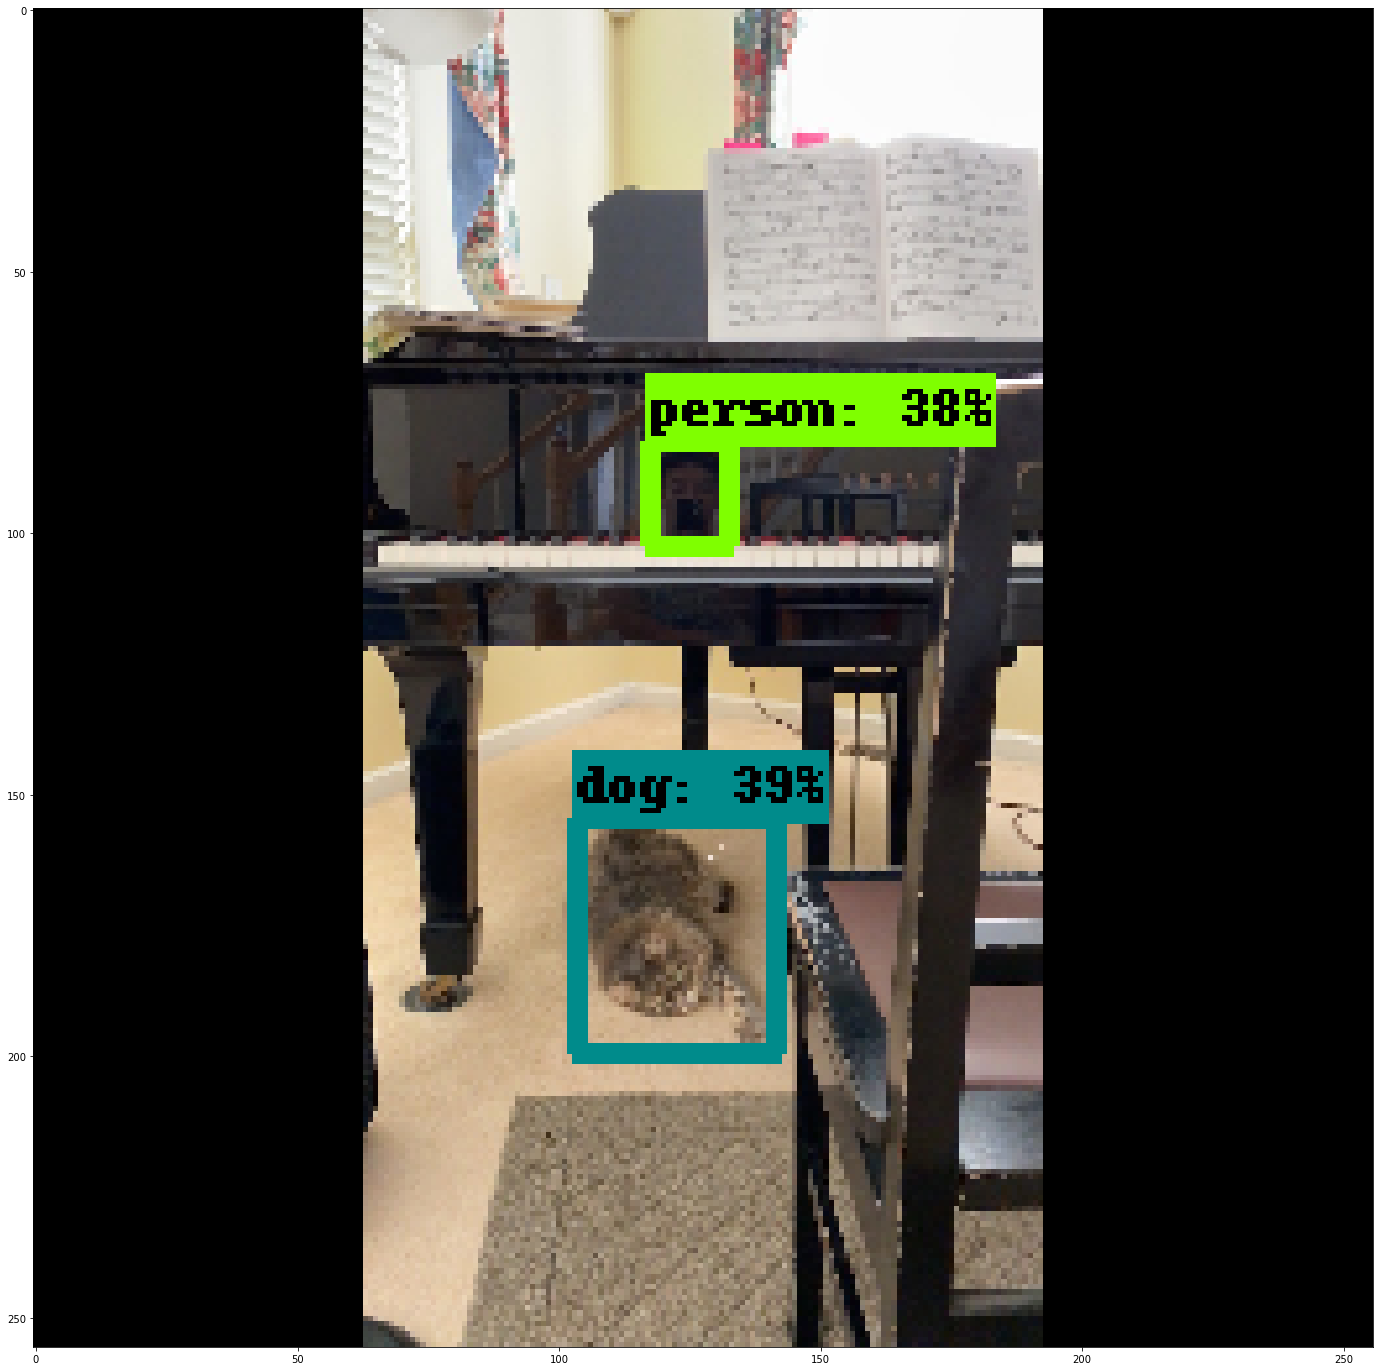

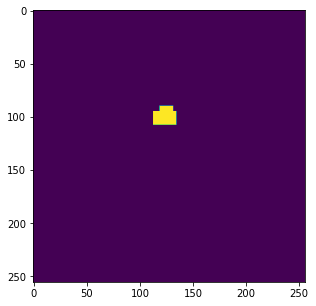

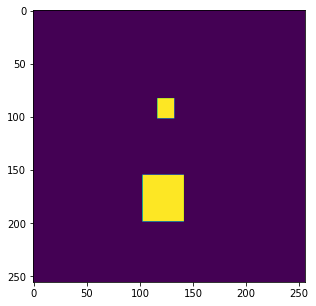

Inpainting...


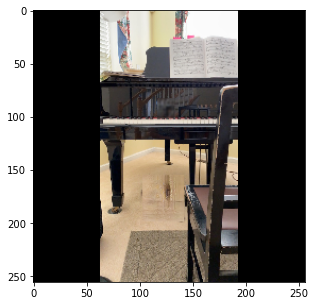

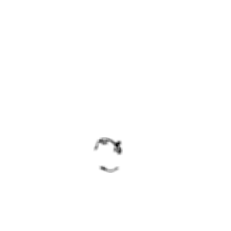

loading dog drawings
load complete


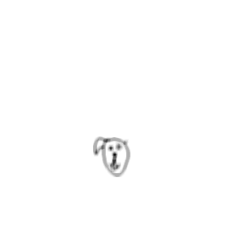

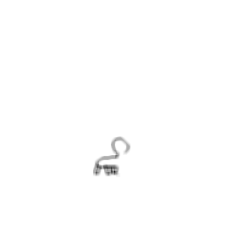

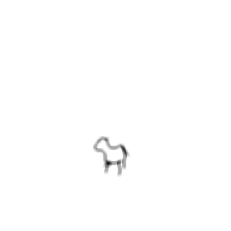

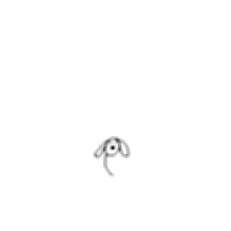

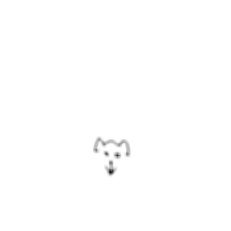

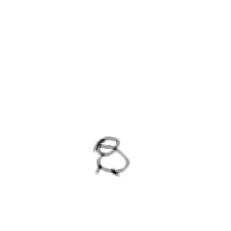

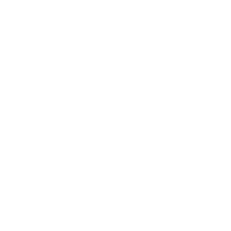

loading face drawings
load complete


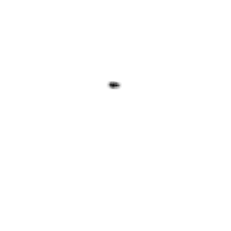

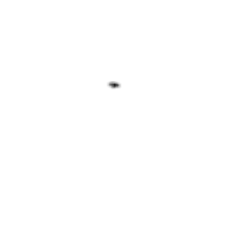

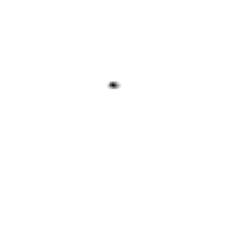

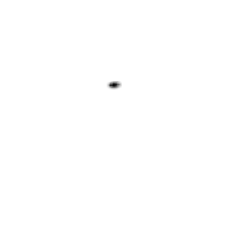

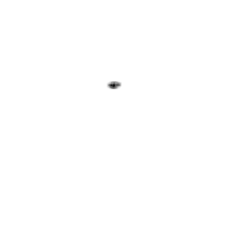

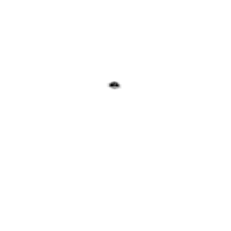

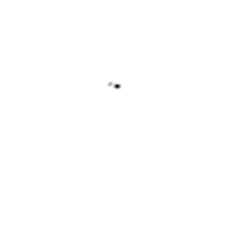

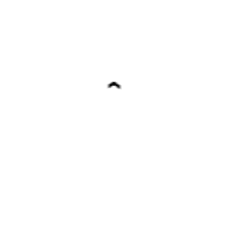

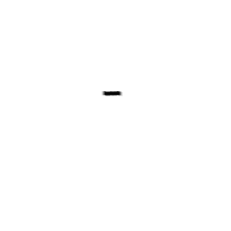

loading t-shirt drawings
load complete


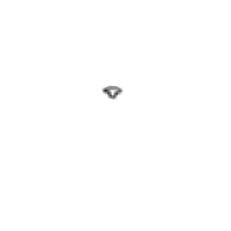

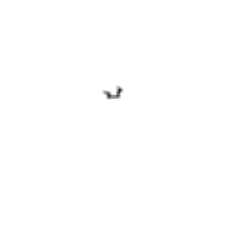

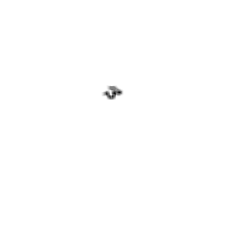

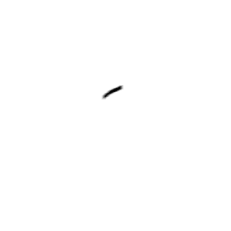

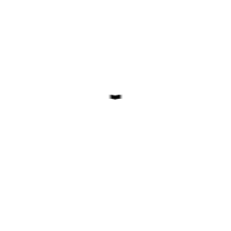

loading pants drawings
load complete


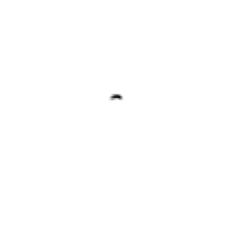

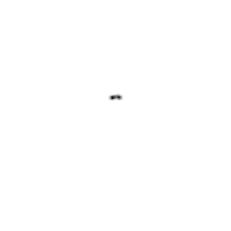

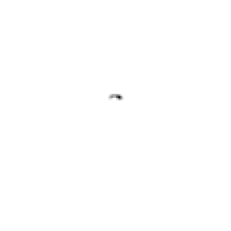

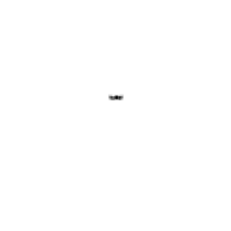

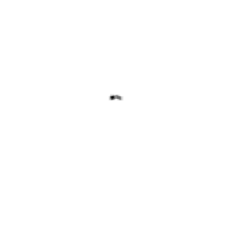

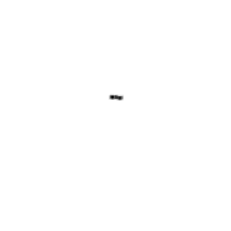

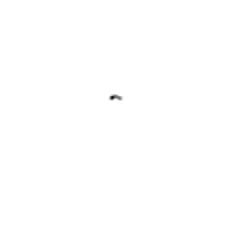

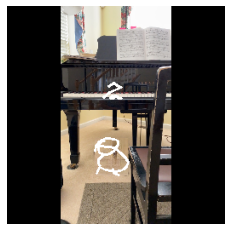

Evaluating :  IMG_2838.jpeg


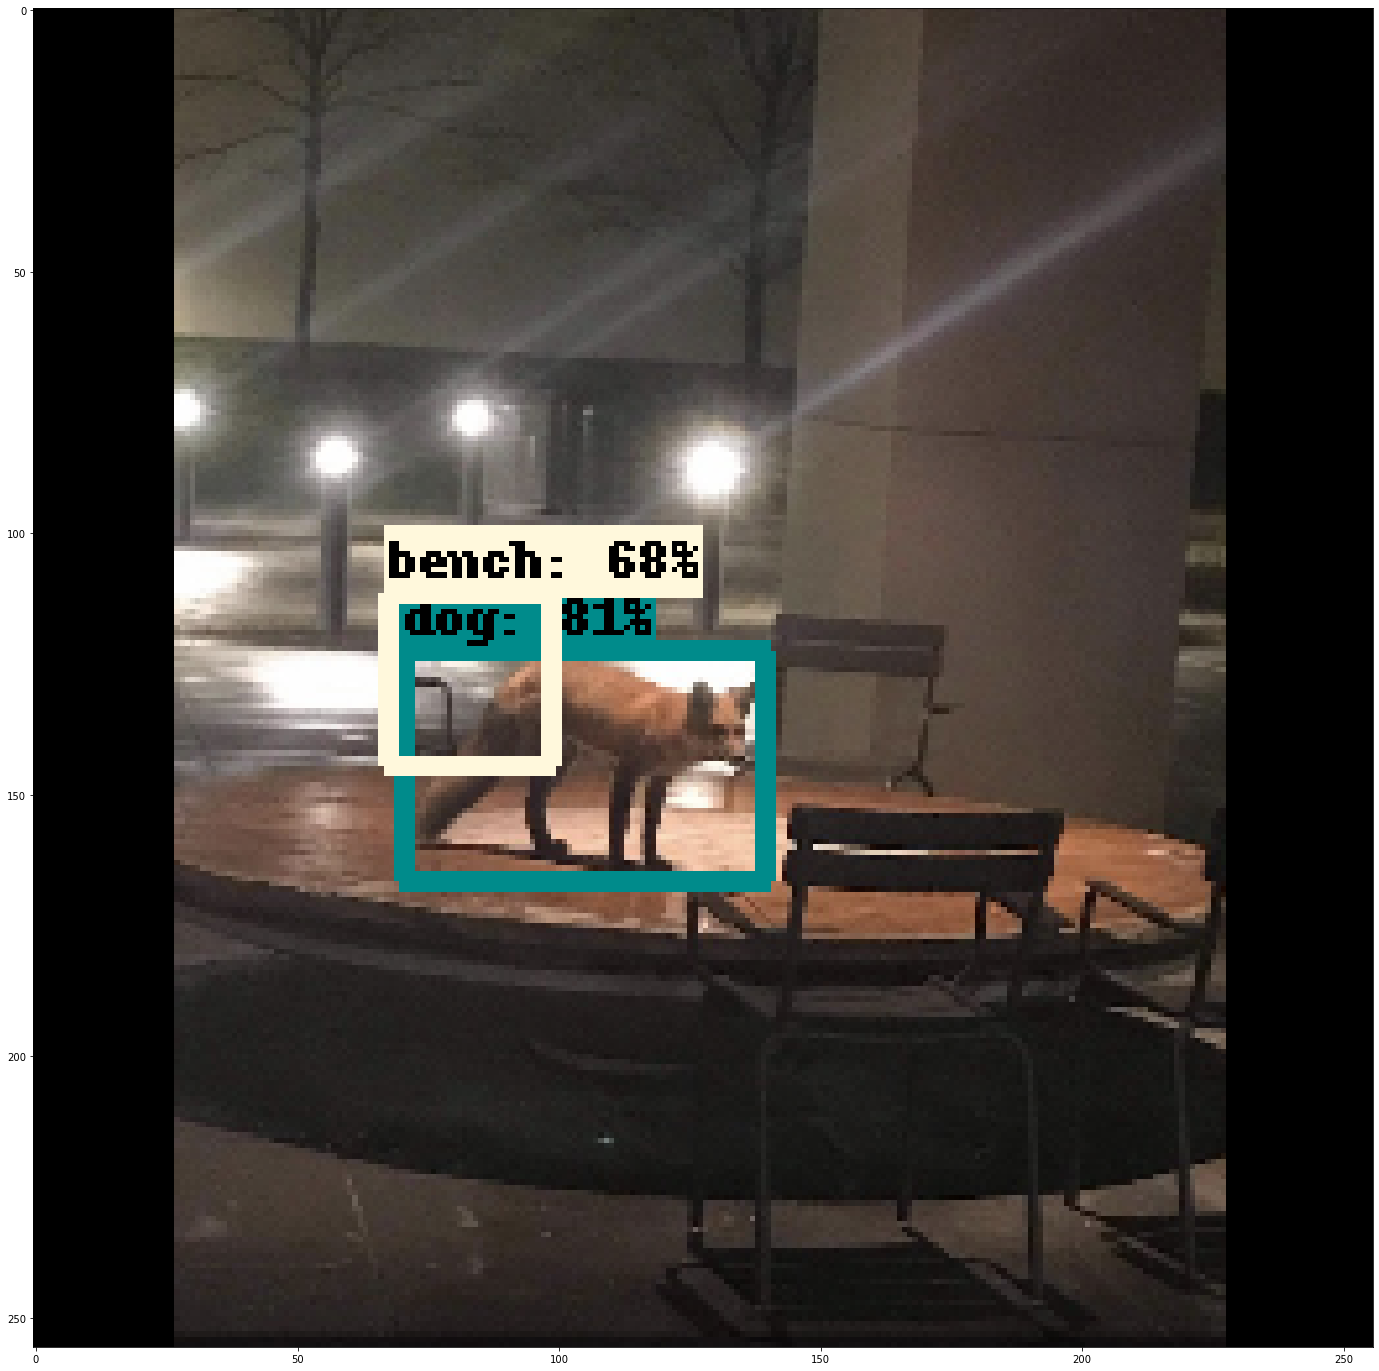

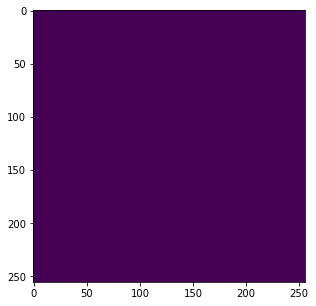

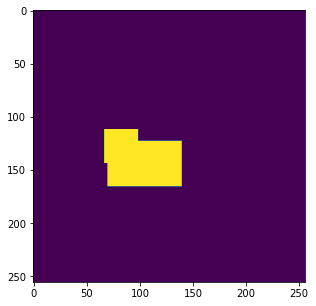

Inpainting...


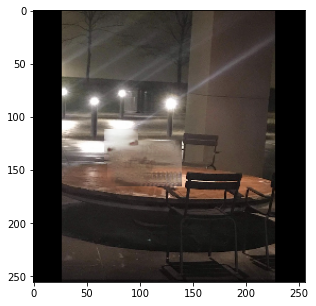

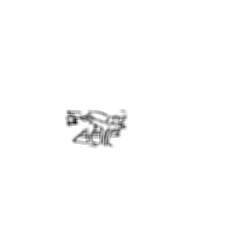

loading dog drawings
load complete


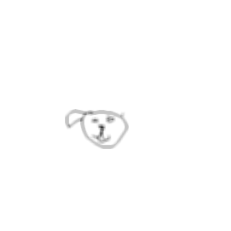

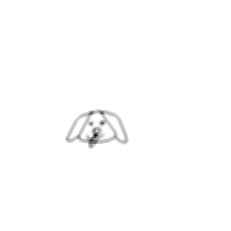

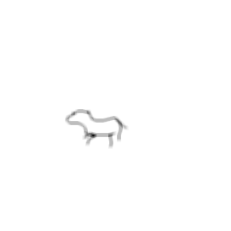

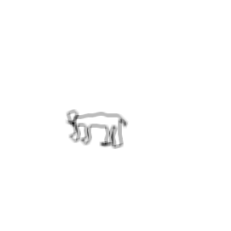

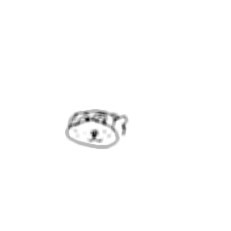

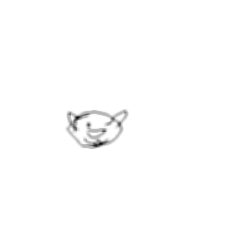

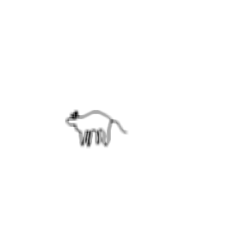

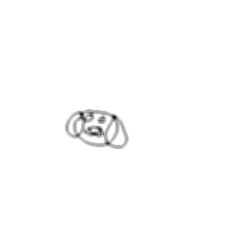

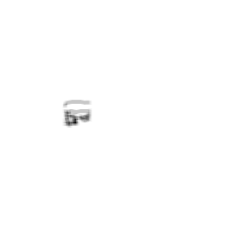

loading bench drawings
load complete


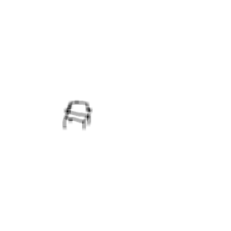

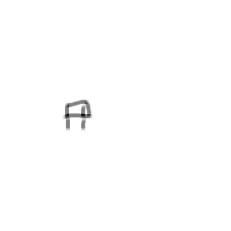

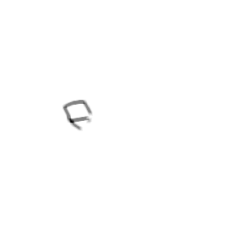

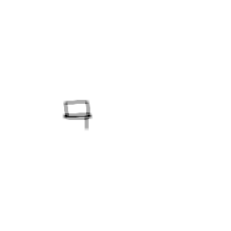

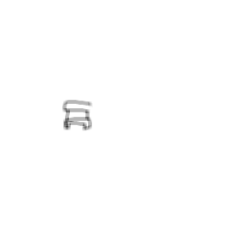

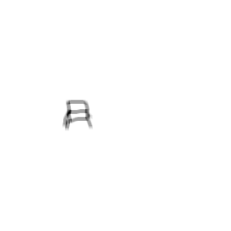

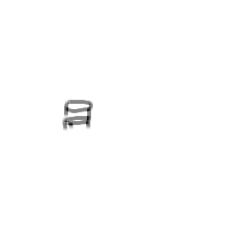

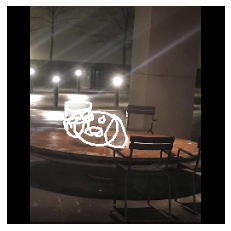

Evaluating :  IMG_0711.jpeg


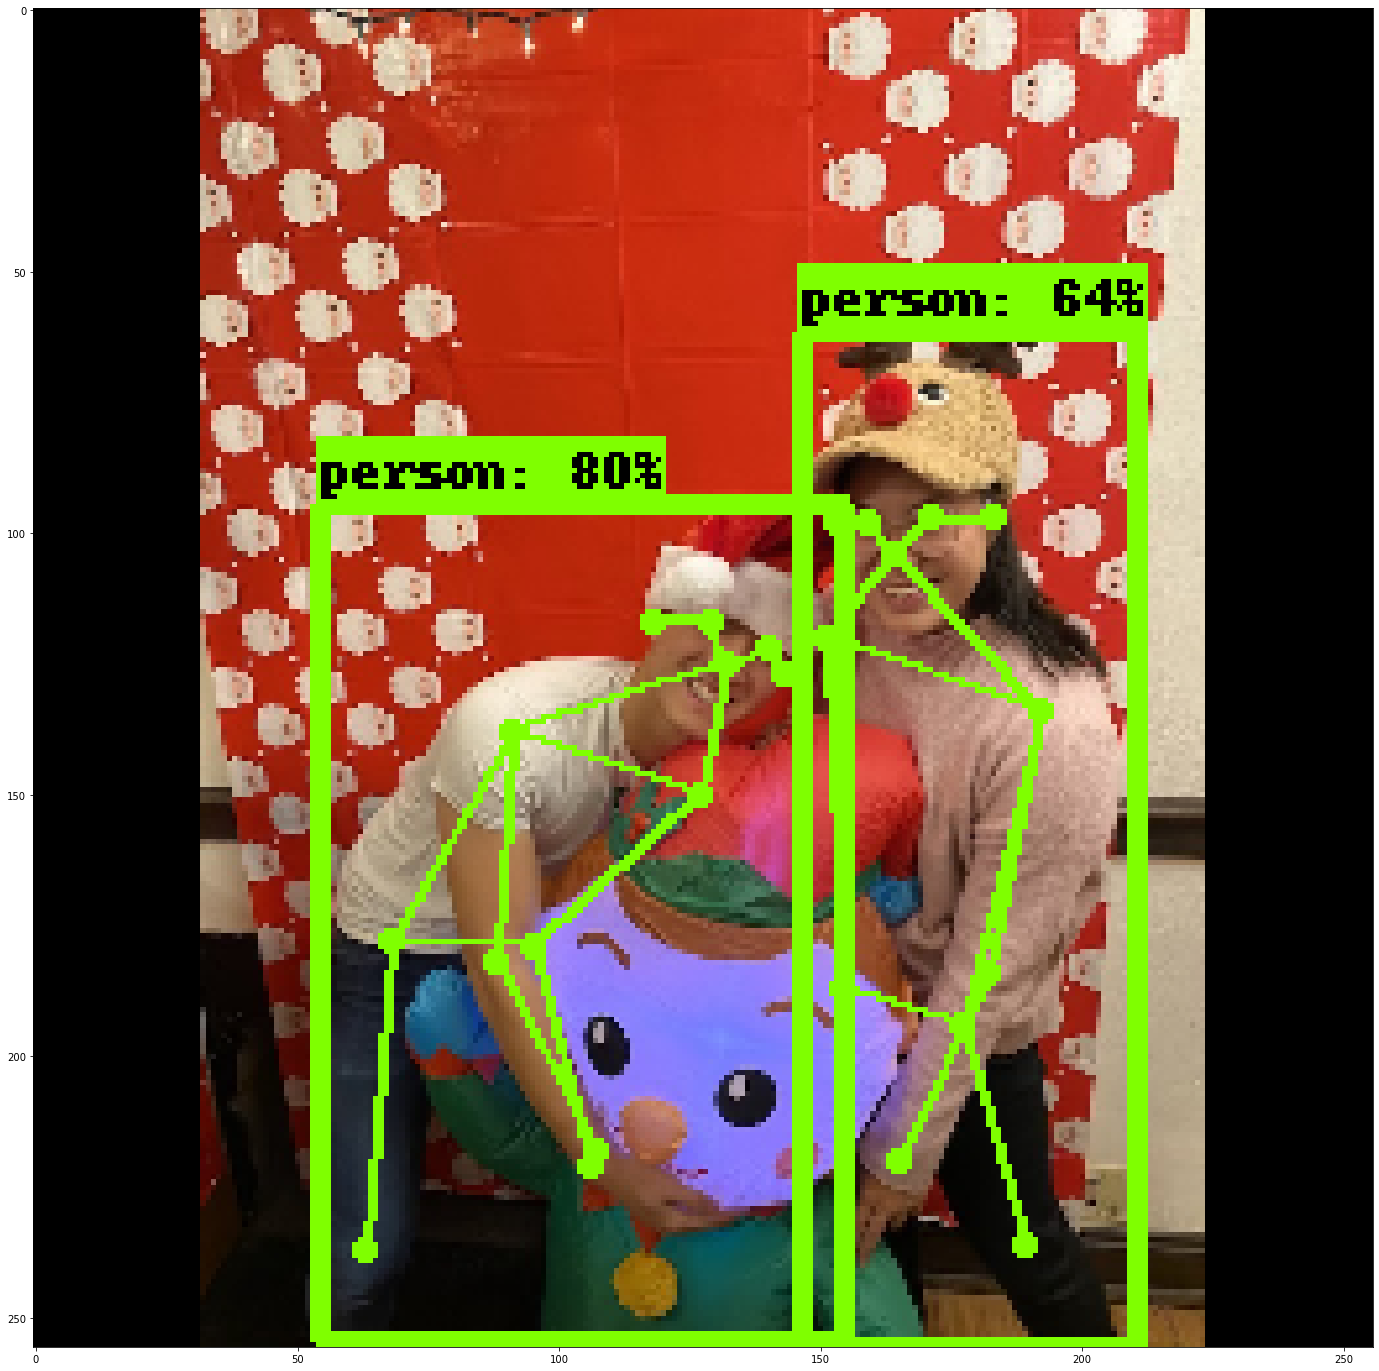

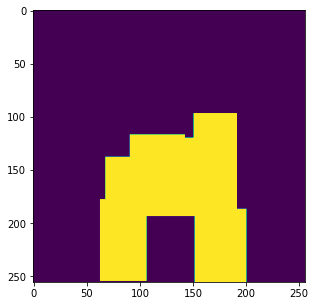

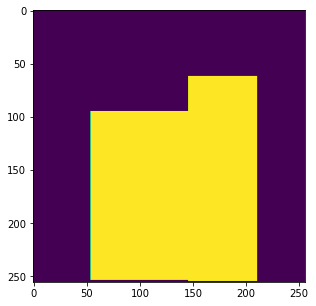

Inpainting...


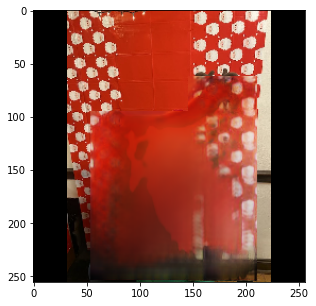

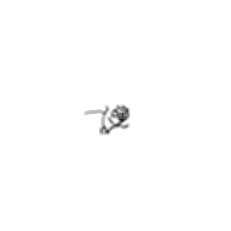

loading face drawings
load complete


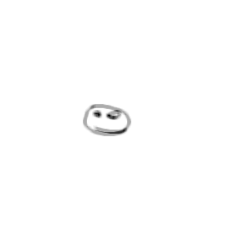

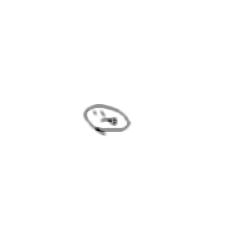

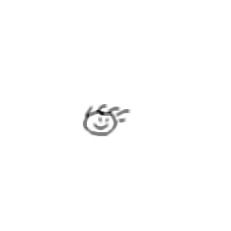

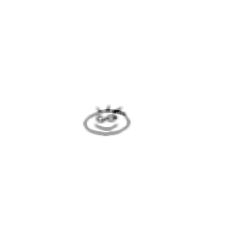

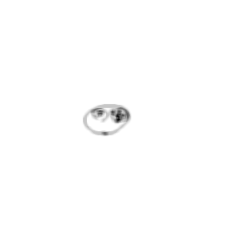

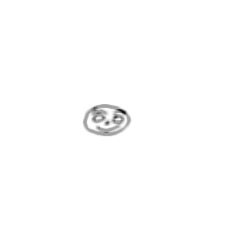

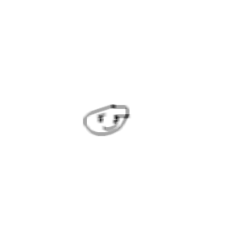

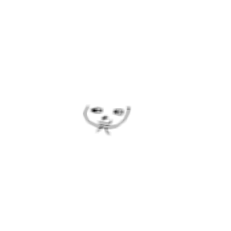

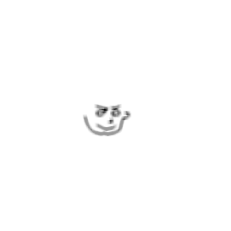

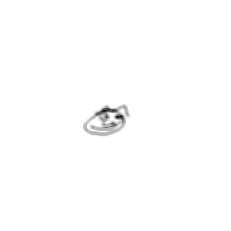

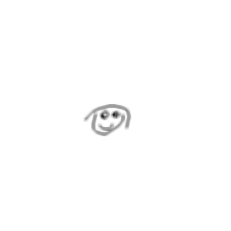

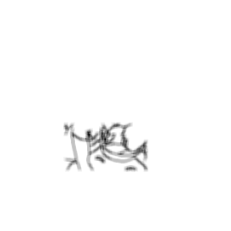

loading t-shirt drawings
load complete


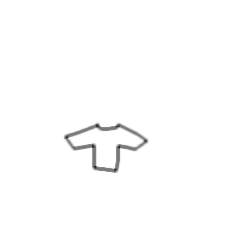

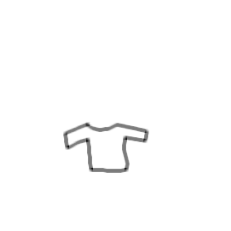

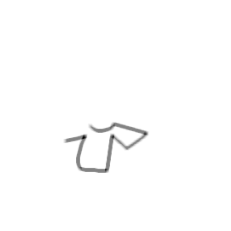

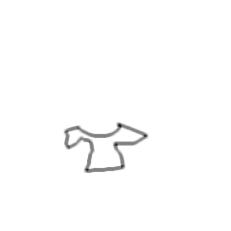

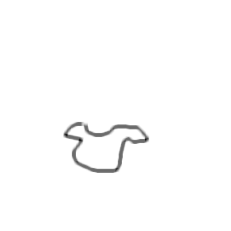

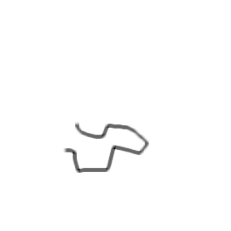

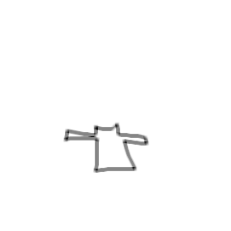

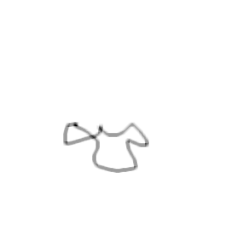

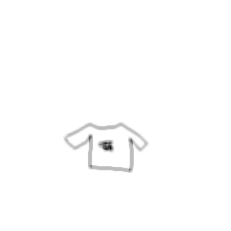

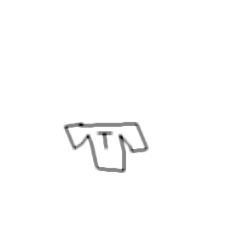

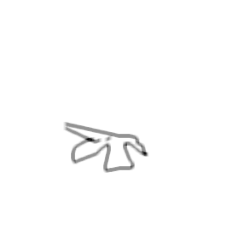

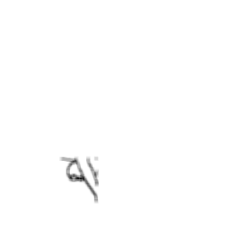

loading pants drawings
load complete


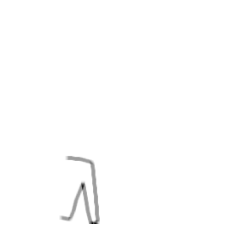

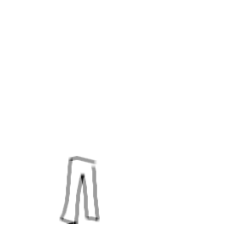

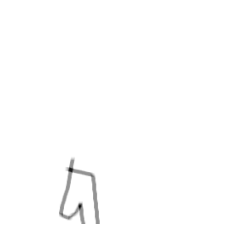

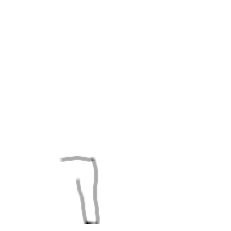

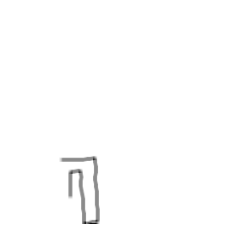

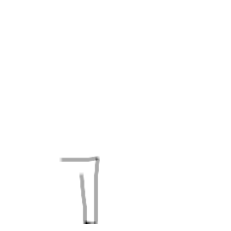

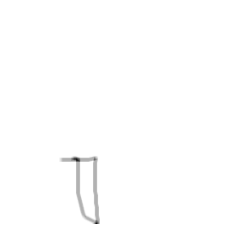

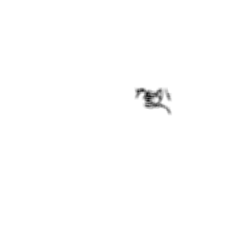

loading face drawings
load complete


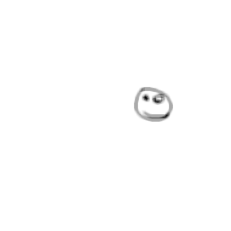

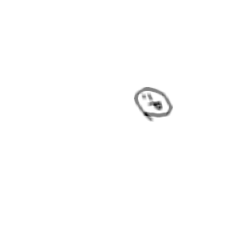

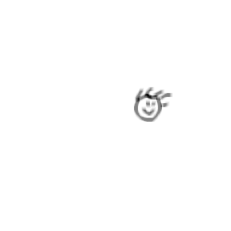

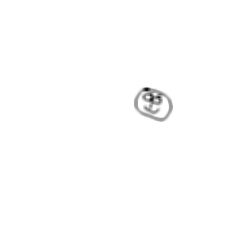

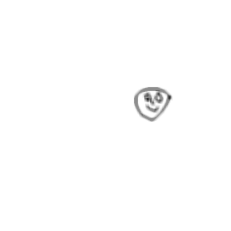

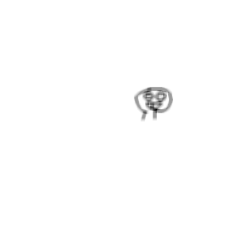

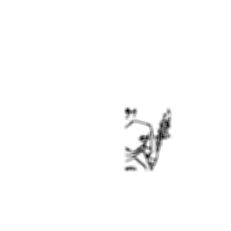

loading t-shirt drawings
load complete


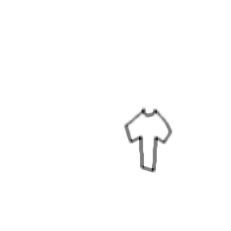

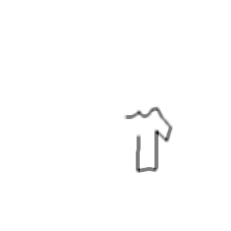

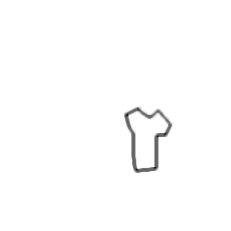

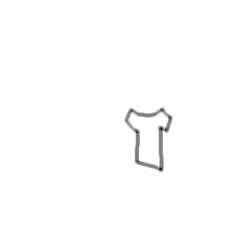

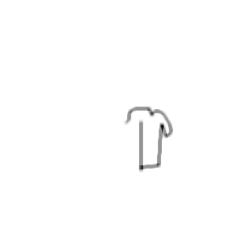

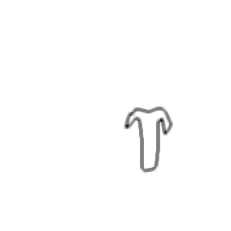

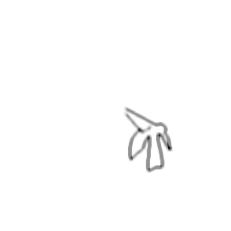

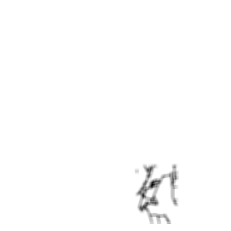

loading pants drawings
load complete


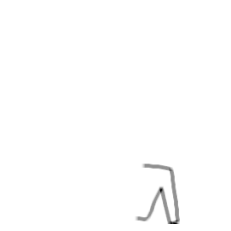

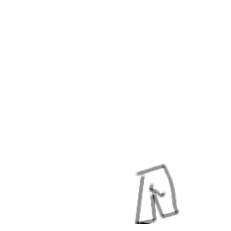

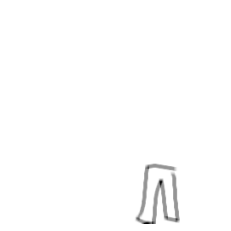

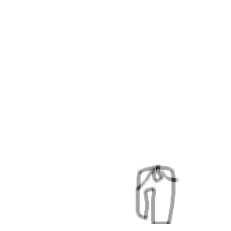

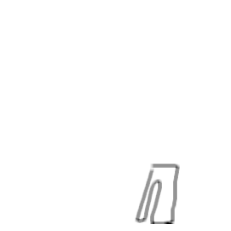

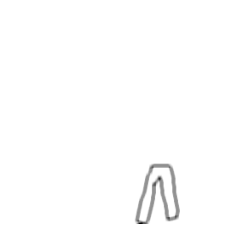

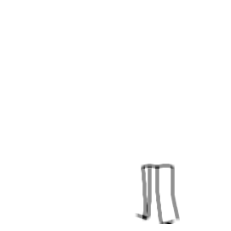

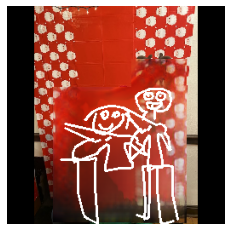

Evaluating :  000000548780.jpg


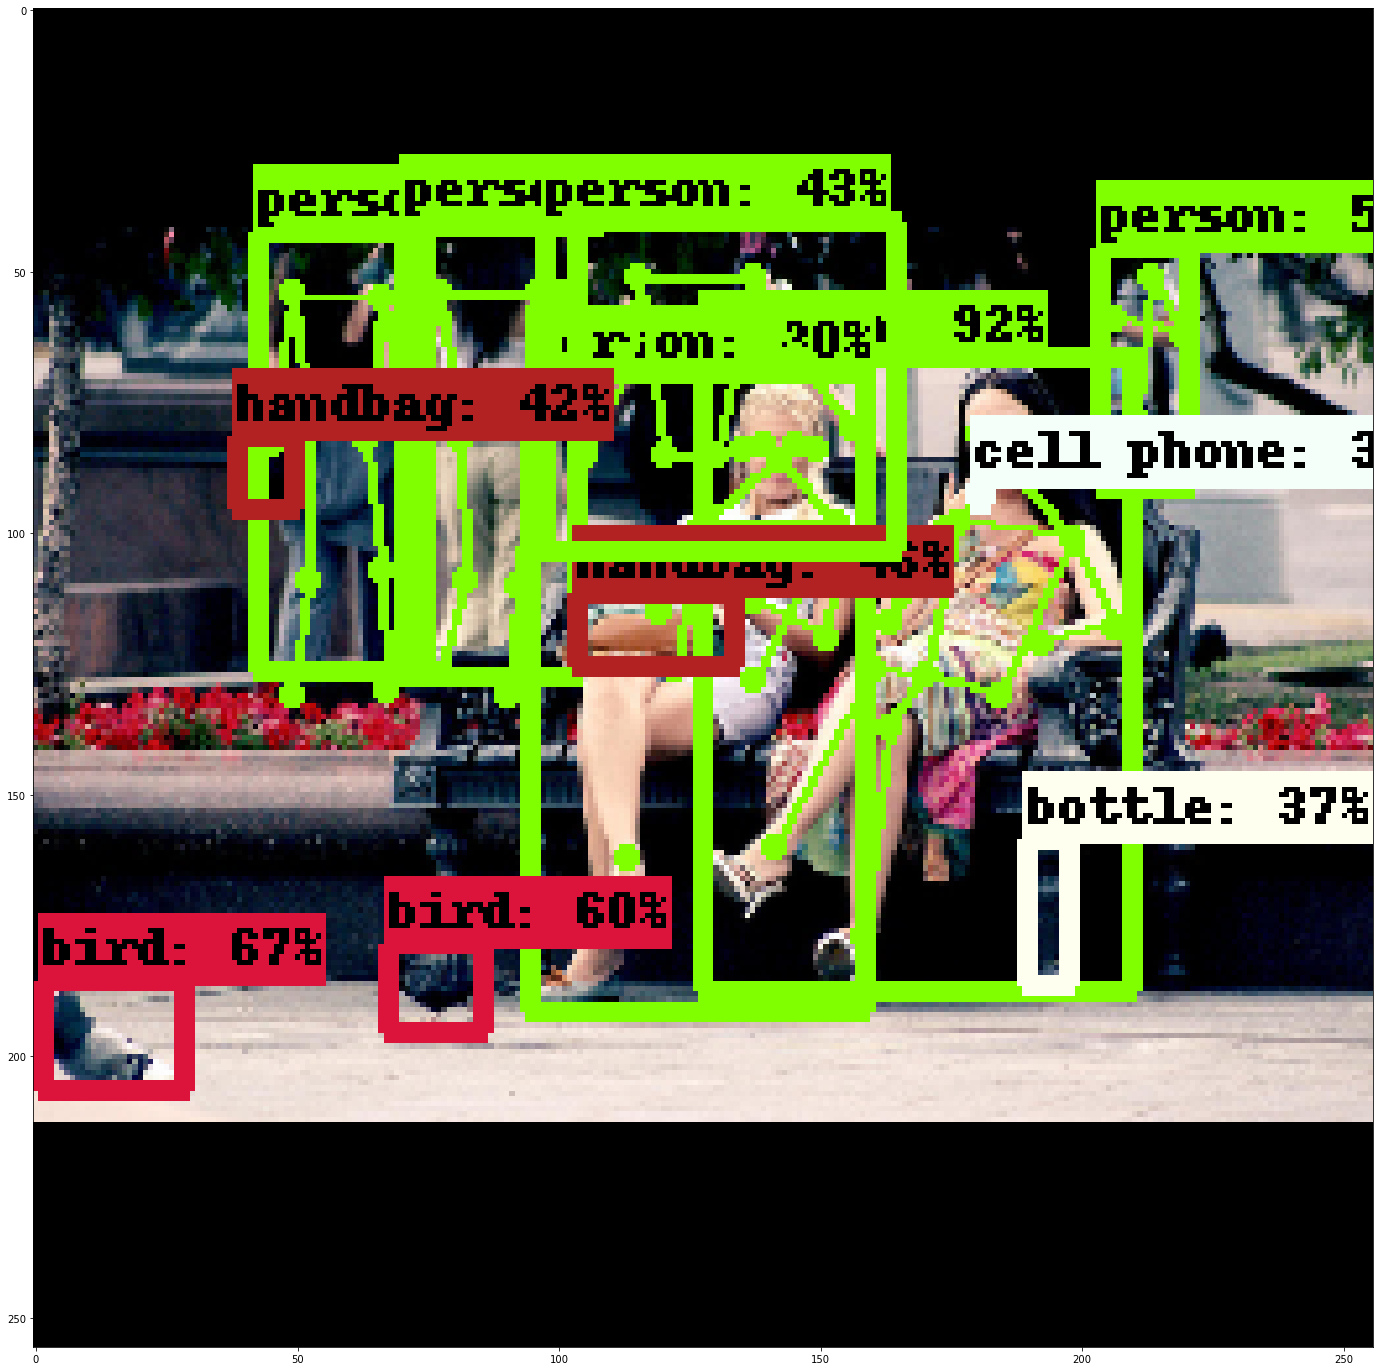

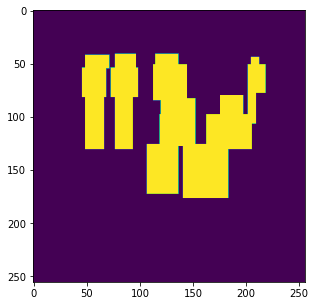

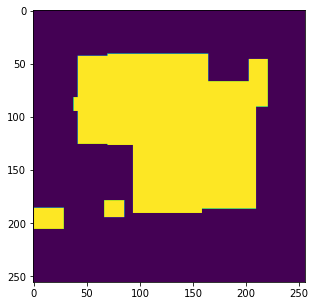

Inpainting...


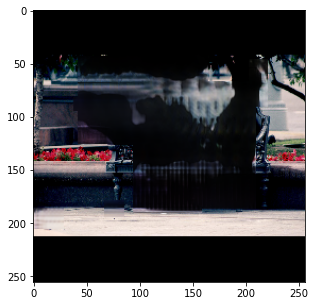

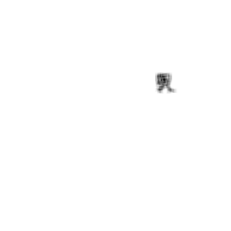

loading face drawings
load complete


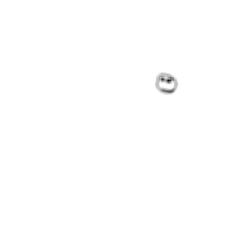

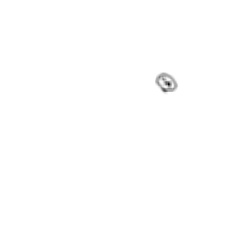

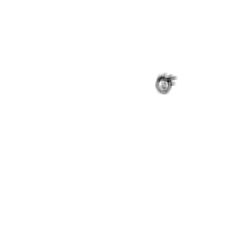

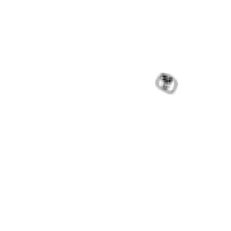

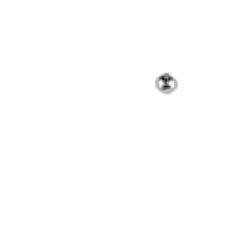

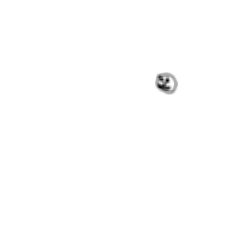

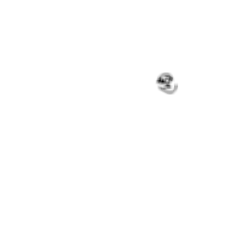

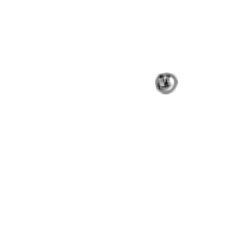

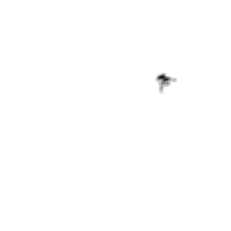

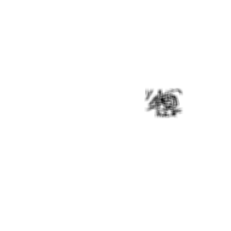

loading t-shirt drawings
load complete


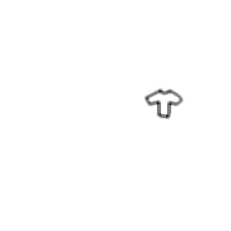

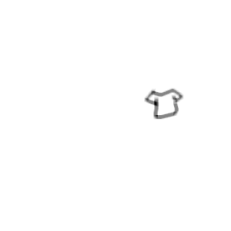

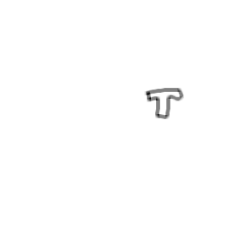

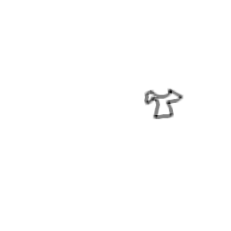

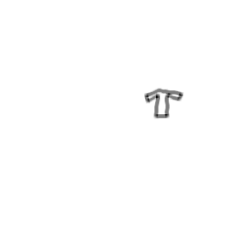

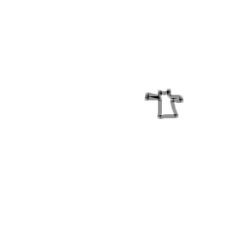

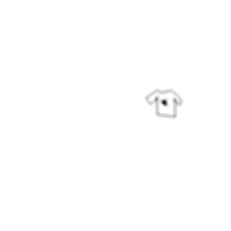

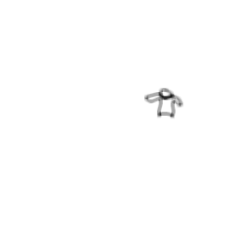

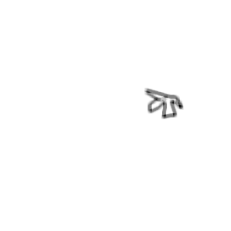

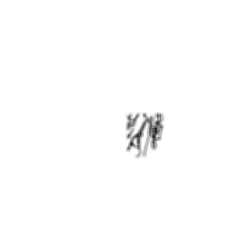

loading pants drawings
load complete


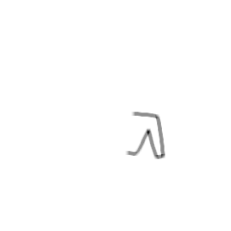

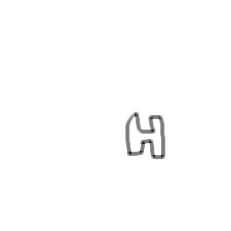

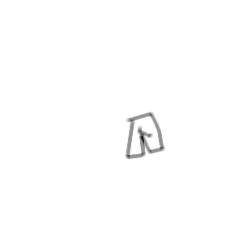

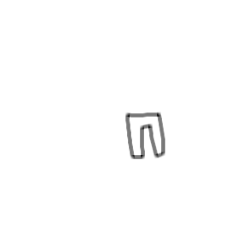

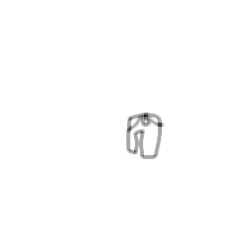

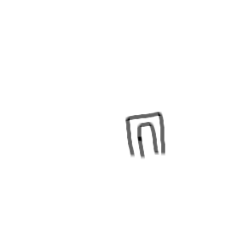

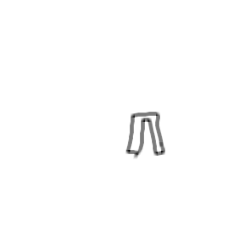

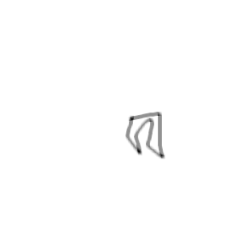

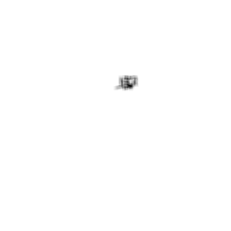

loading face drawings
load complete


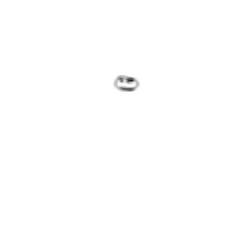

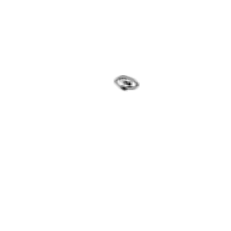

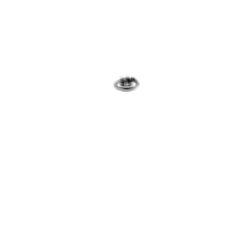

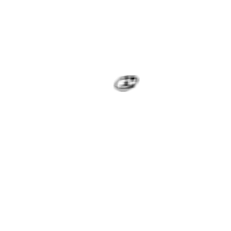

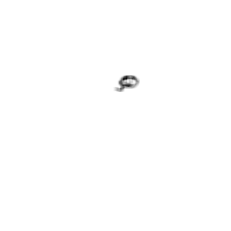

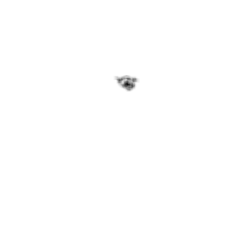

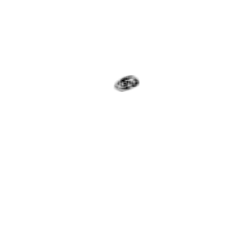

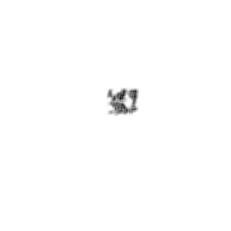

loading t-shirt drawings
load complete


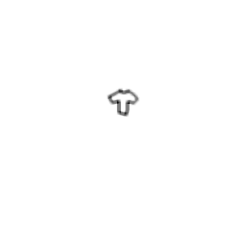

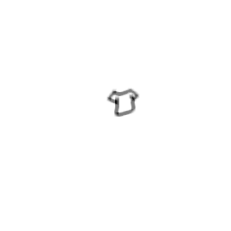

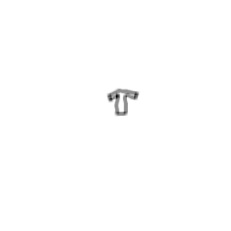

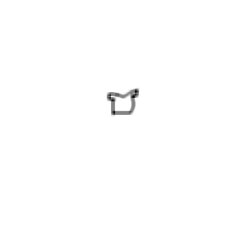

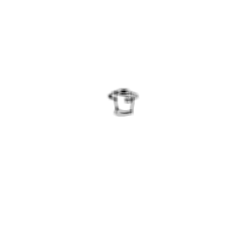

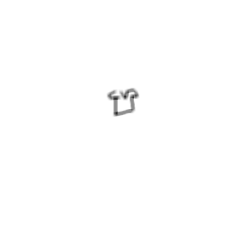

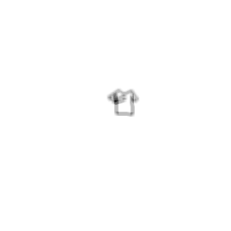

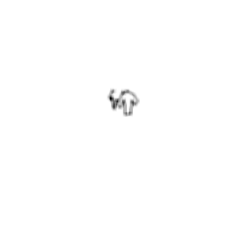

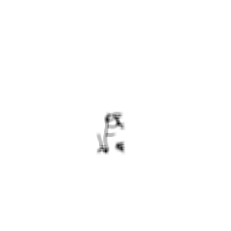

loading pants drawings
load complete


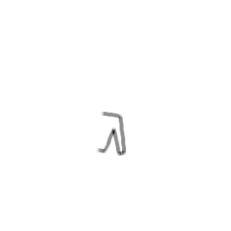

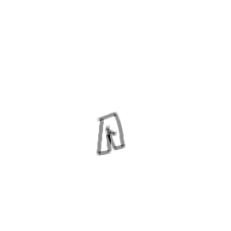

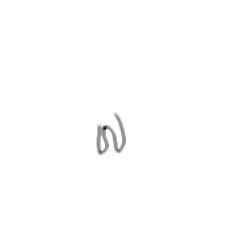

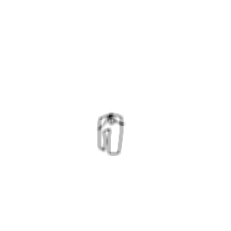

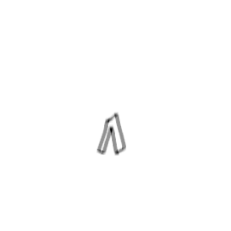

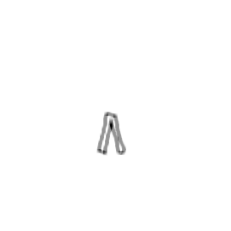

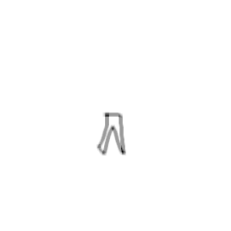

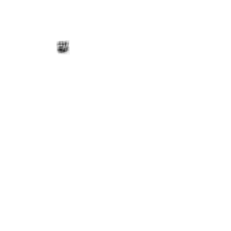

loading face drawings
load complete


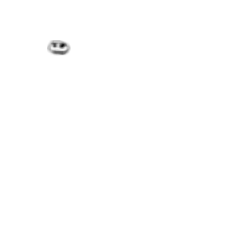

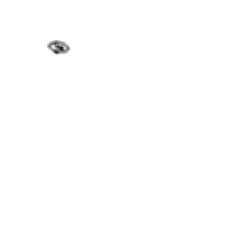

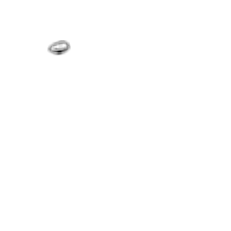

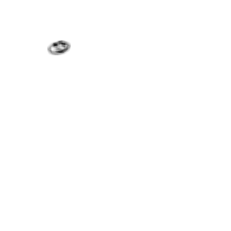

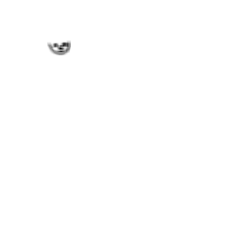

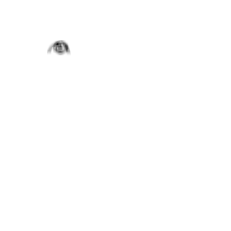

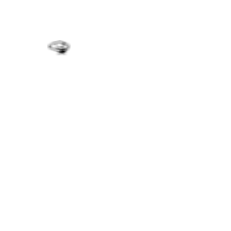

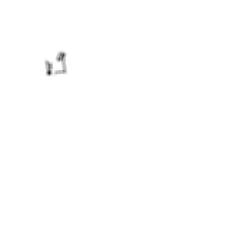

loading t-shirt drawings
load complete


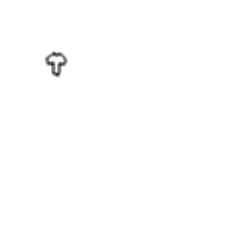

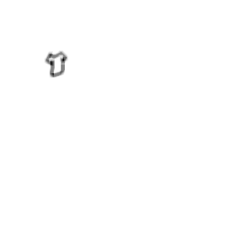

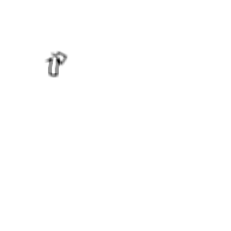

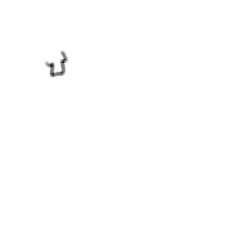

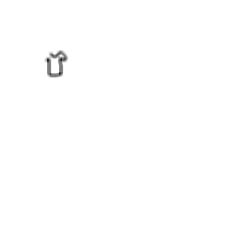

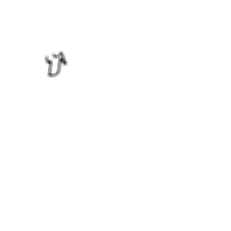

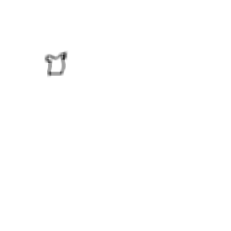

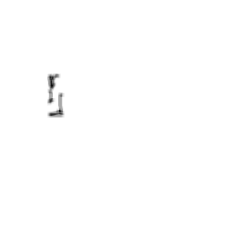

loading pants drawings
load complete


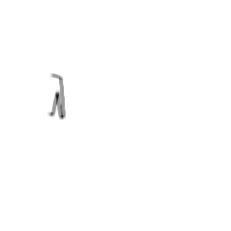

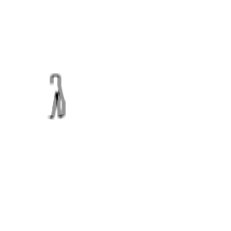

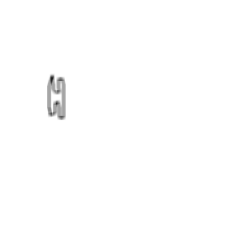

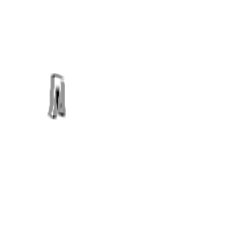

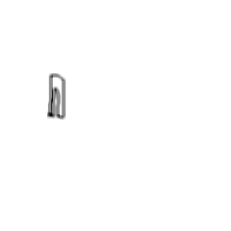

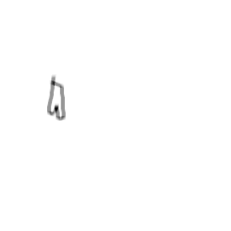

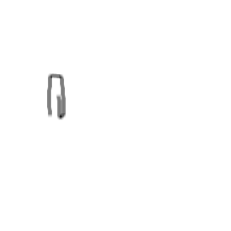

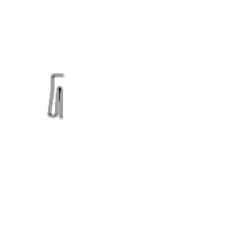

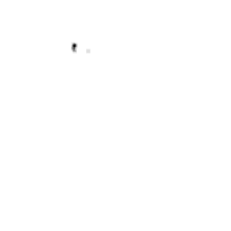

loading face drawings
load complete


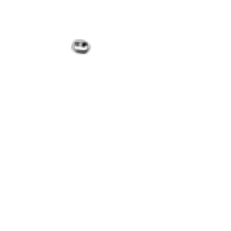

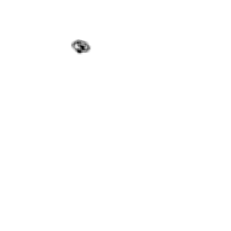

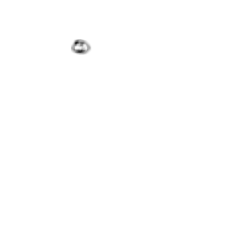

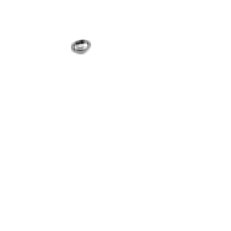

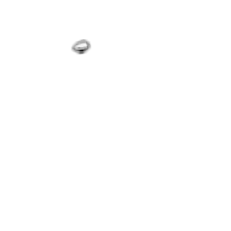

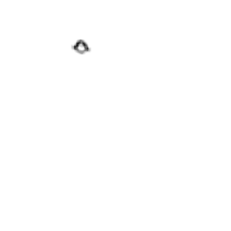

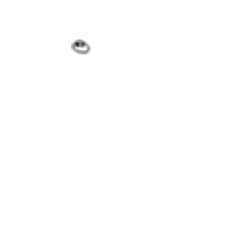

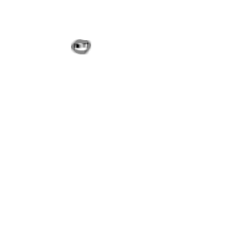

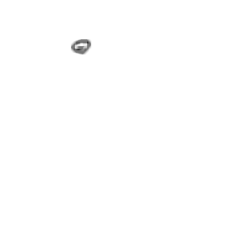

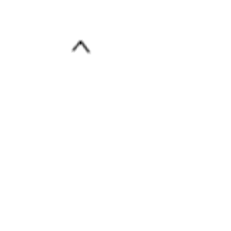

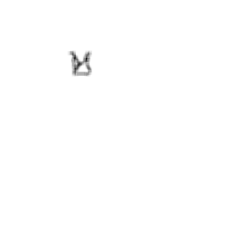

loading t-shirt drawings
load complete


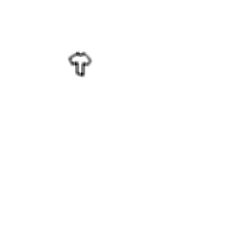

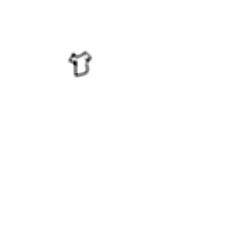

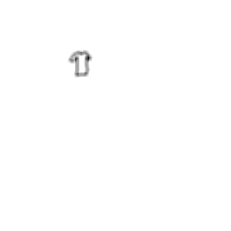

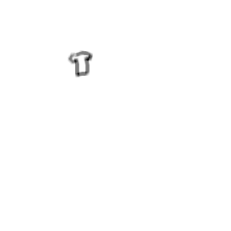

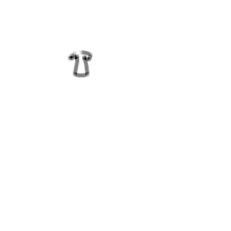

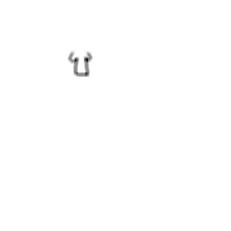

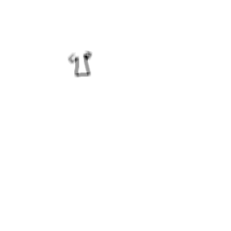

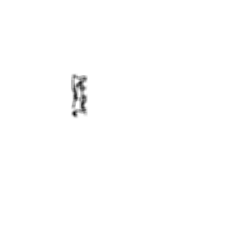

loading pants drawings
load complete


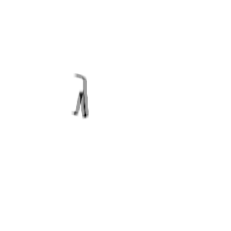

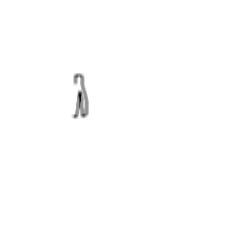

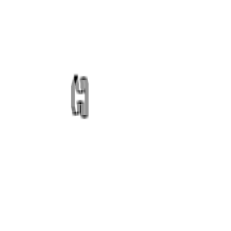

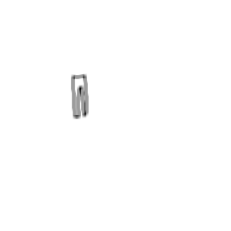

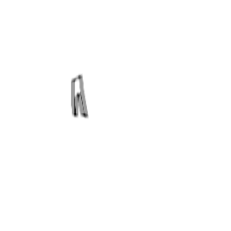

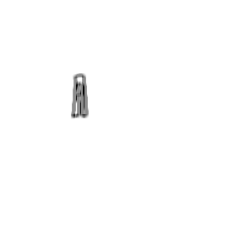

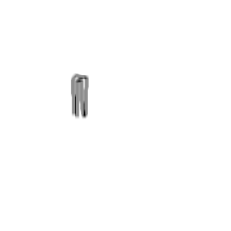

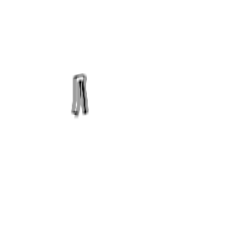

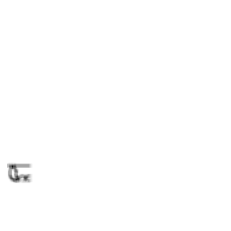

loading bird drawings
load complete


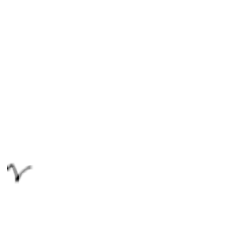

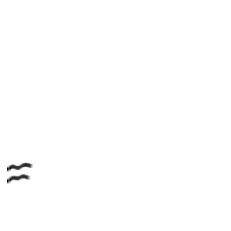

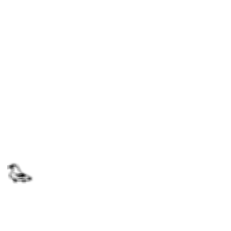

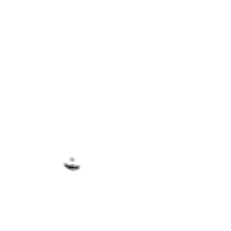

loading bird drawings
load complete


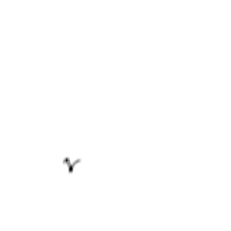

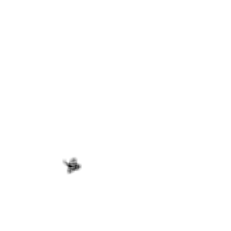

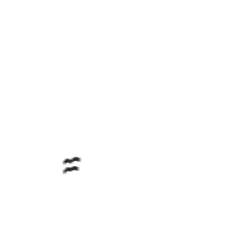

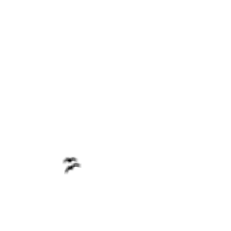

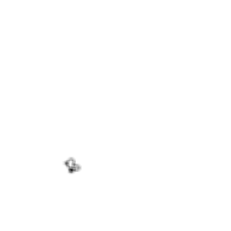

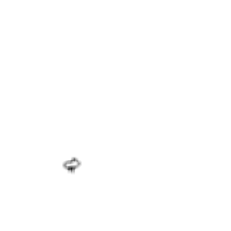

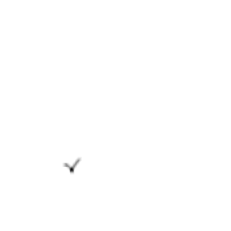

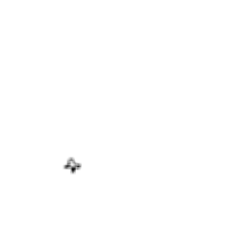

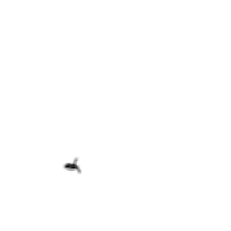

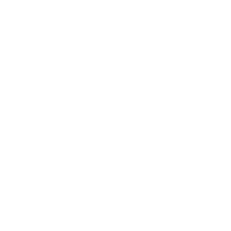

loading face drawings
load complete


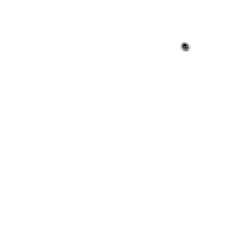

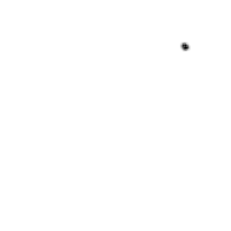

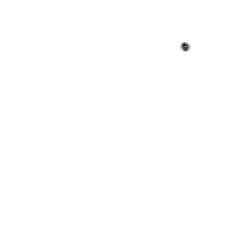

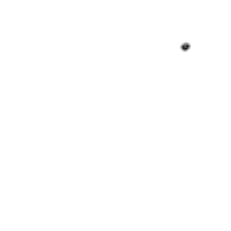

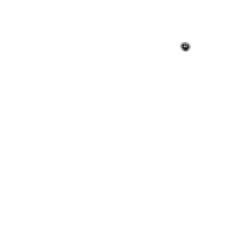

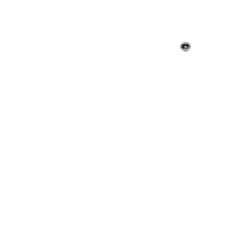

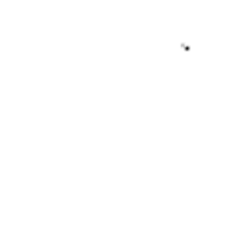

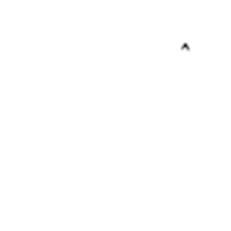

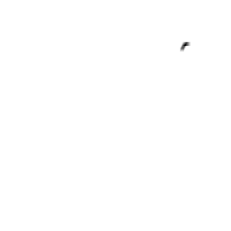

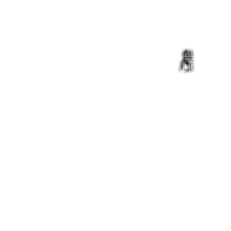

loading t-shirt drawings
load complete


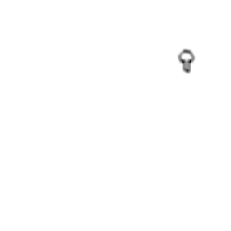

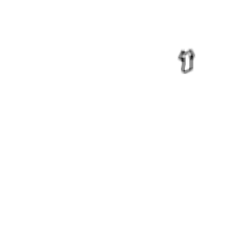

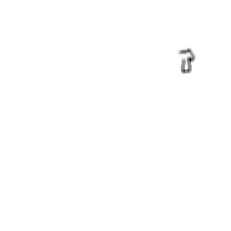

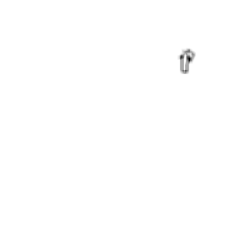

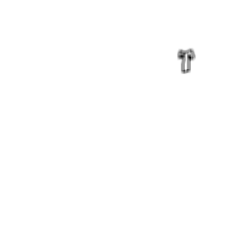

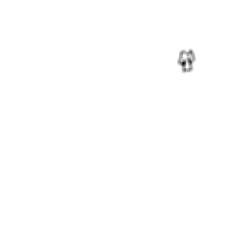

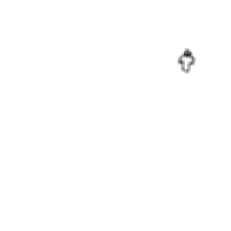

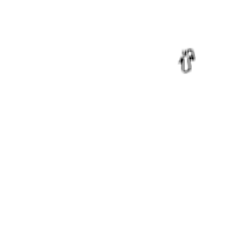

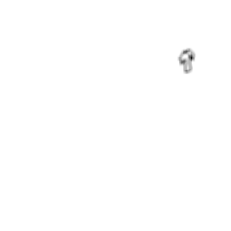

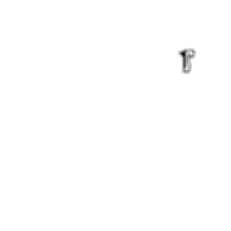

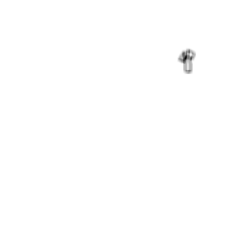

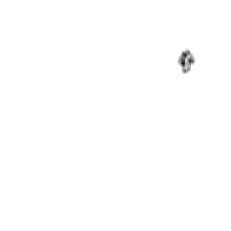

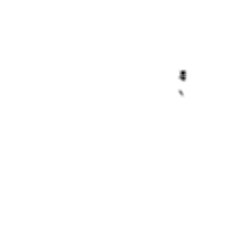

loading pants drawings
load complete


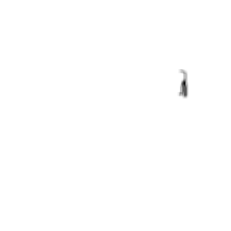

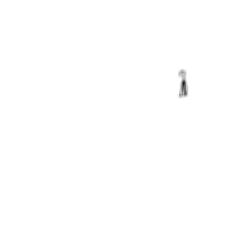

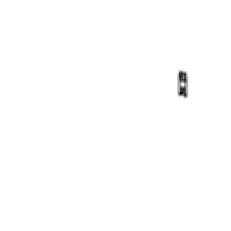

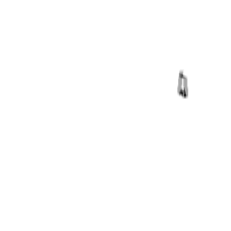

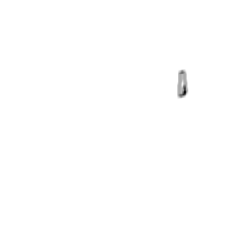

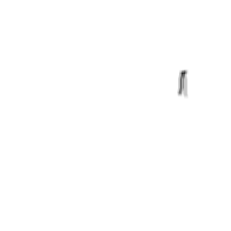

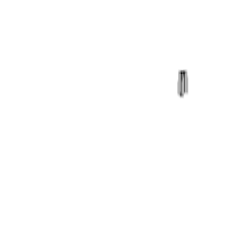

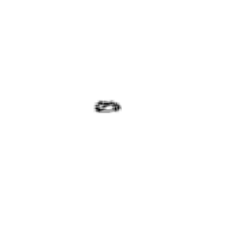

loading purse drawings
load complete


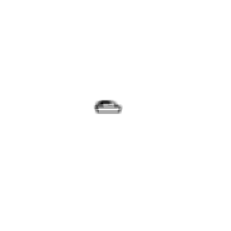

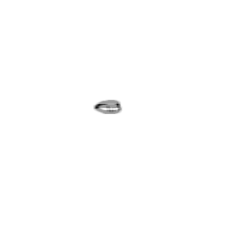

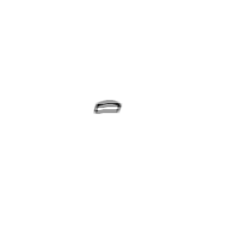

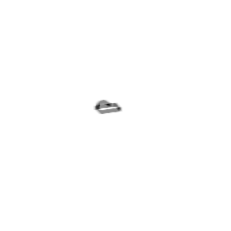

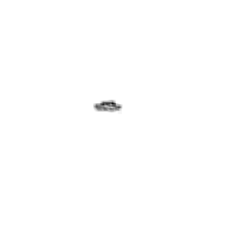

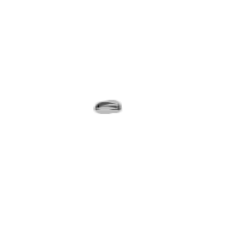

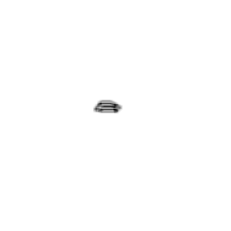

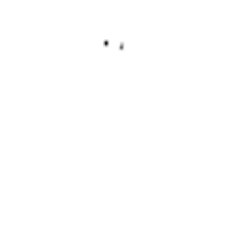

loading face drawings
load complete


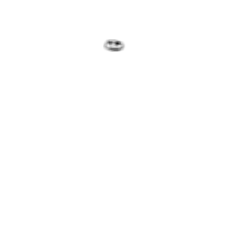

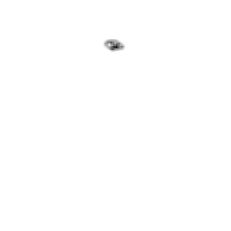

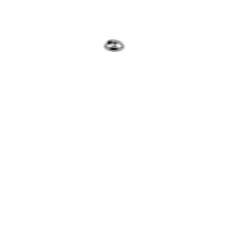

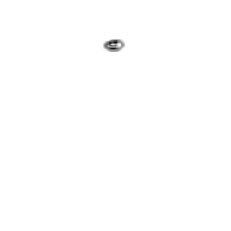

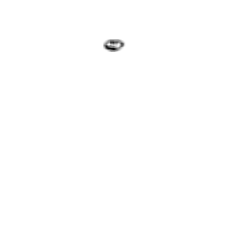

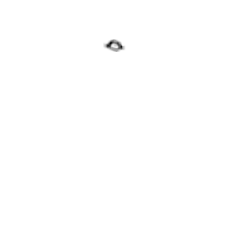

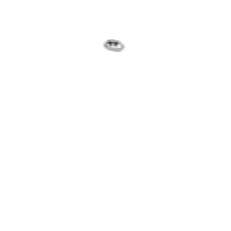

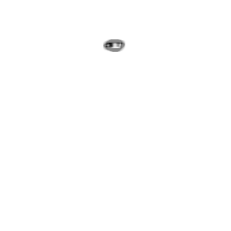

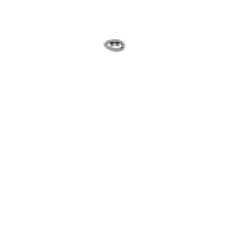

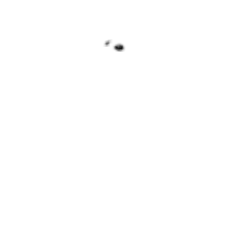

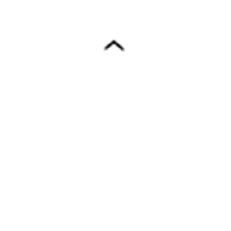

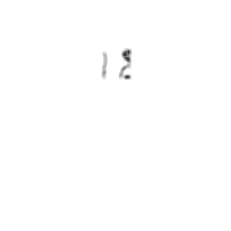

loading t-shirt drawings
load complete


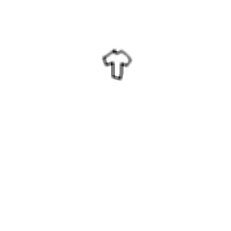

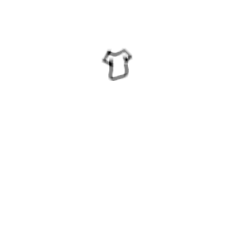

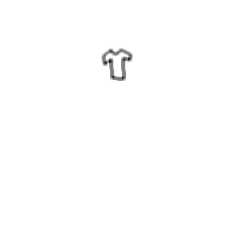

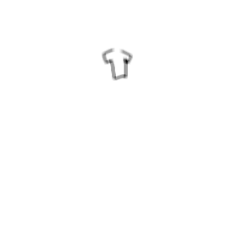

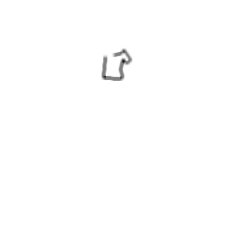

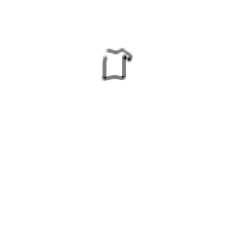

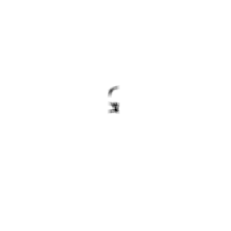

loading pants drawings
load complete


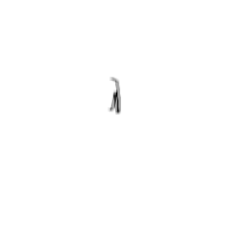

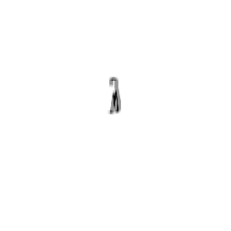

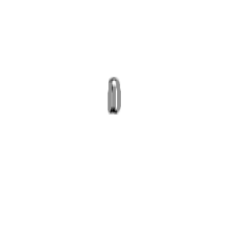

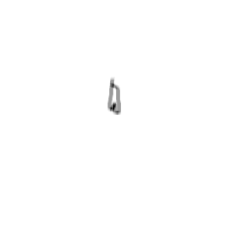

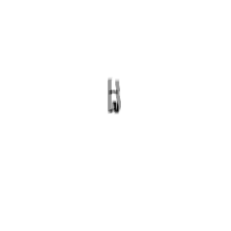

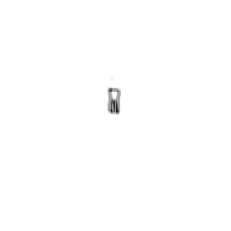

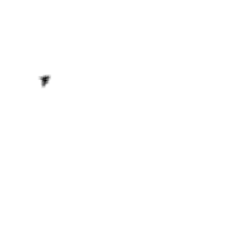

loading purse drawings
load complete


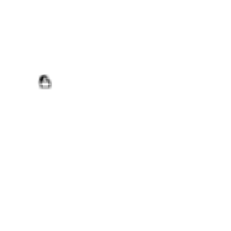

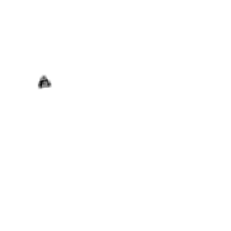

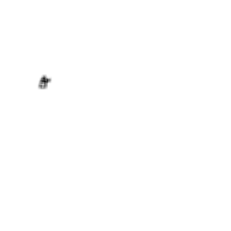

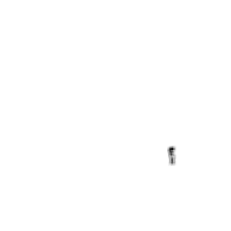

loading wine bottle drawings
load complete


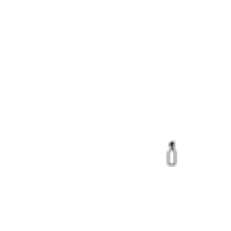

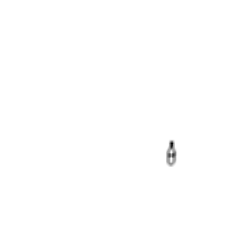

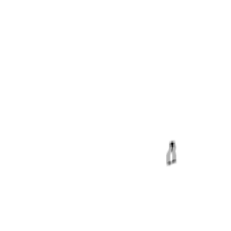

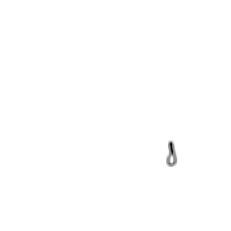

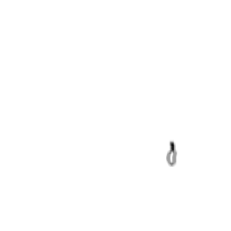

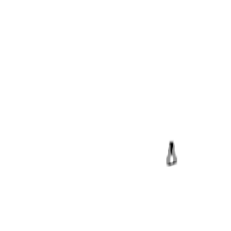

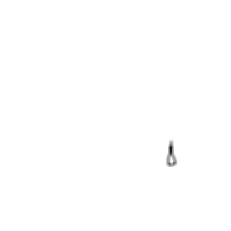

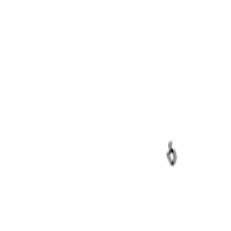

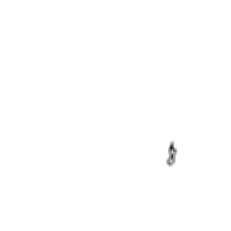

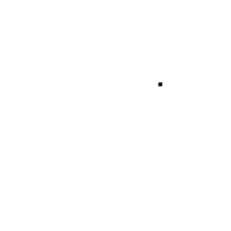

loading cell phone drawings
load complete


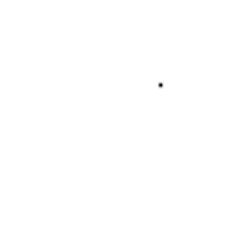

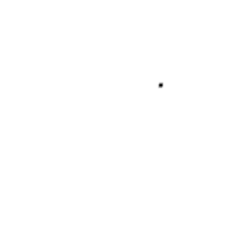

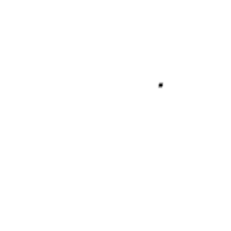

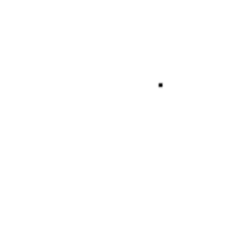

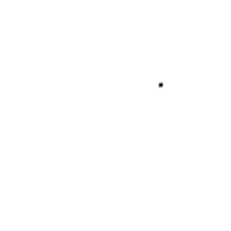

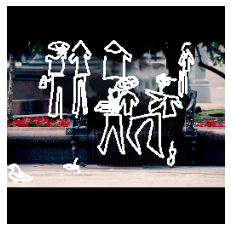

Evaluating :  IMG_0969.jpeg


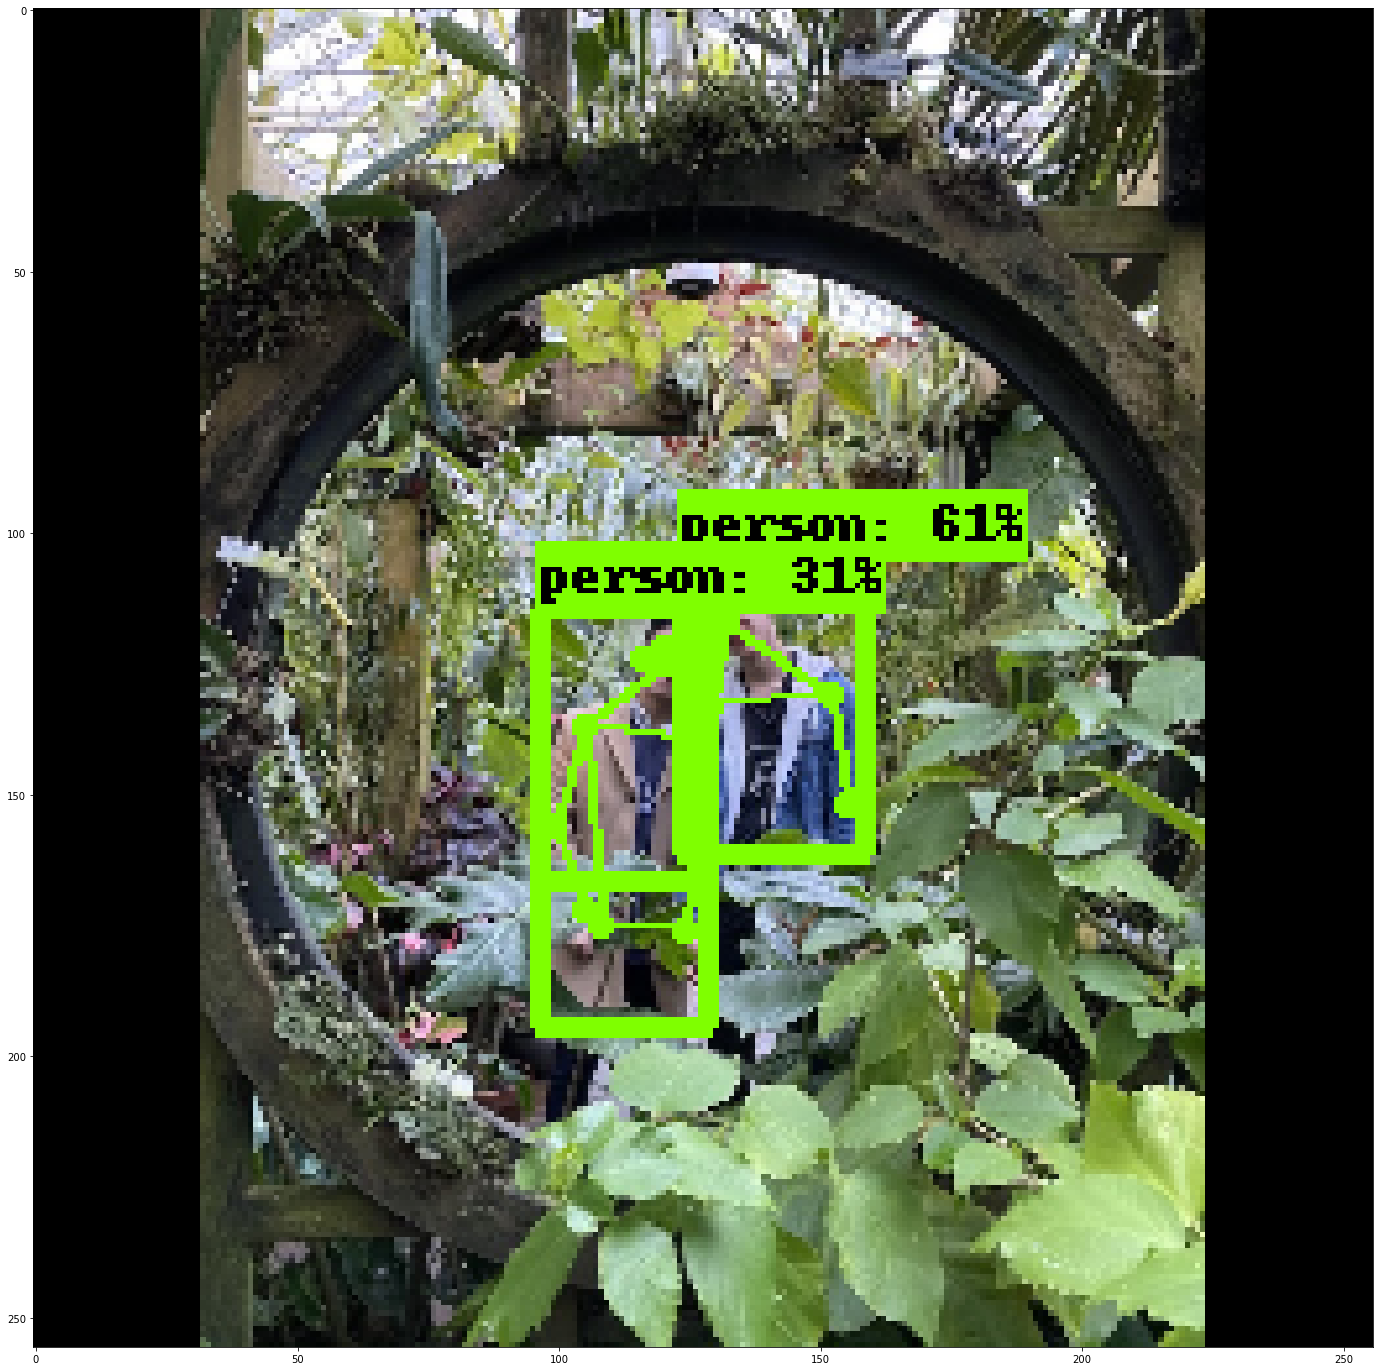

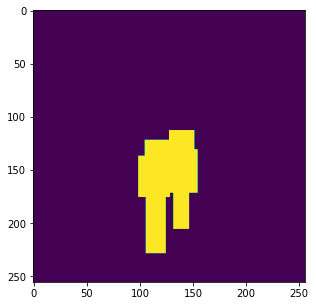

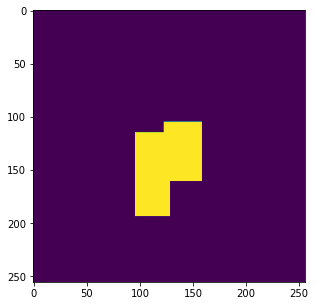

Inpainting...


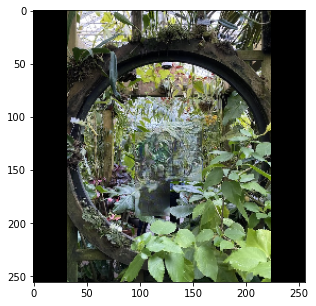

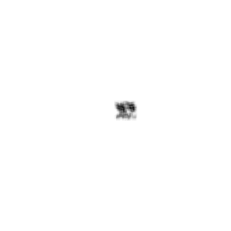

loading face drawings
load complete


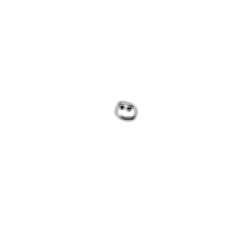

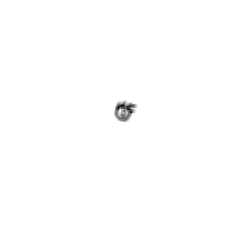

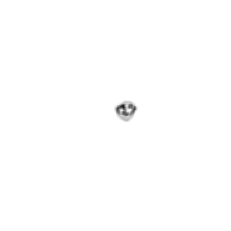

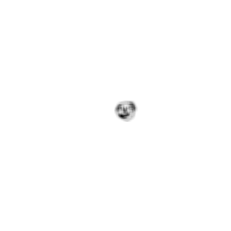

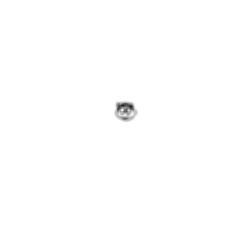

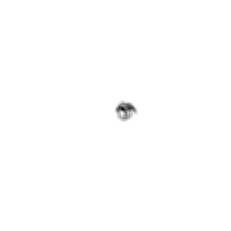

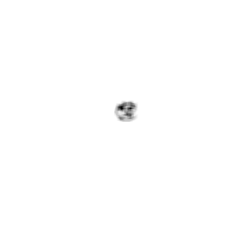

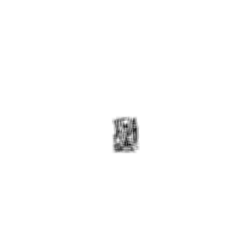

loading t-shirt drawings
load complete


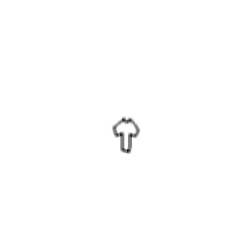

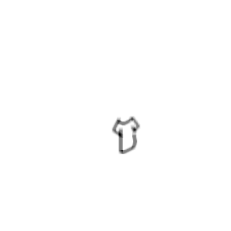

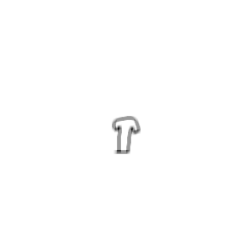

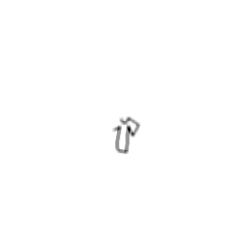

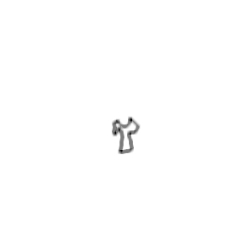

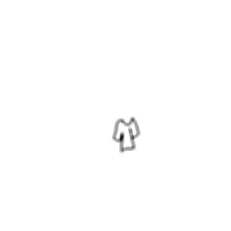

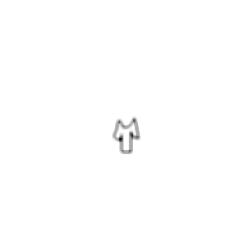

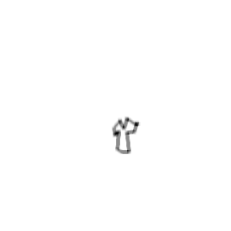

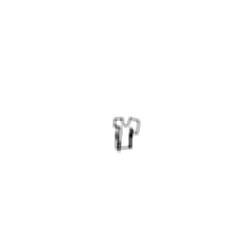

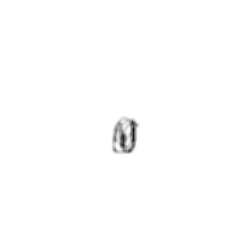

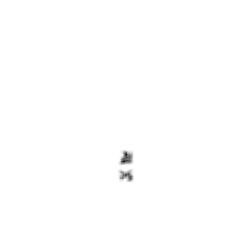

loading pants drawings
load complete


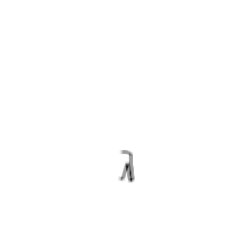

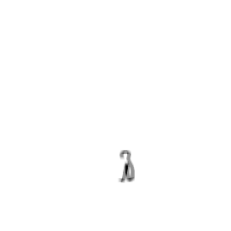

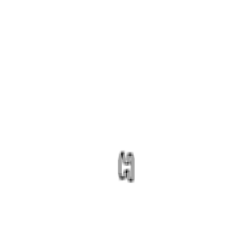

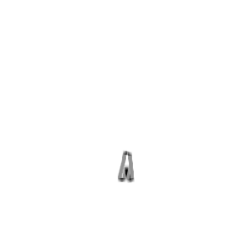

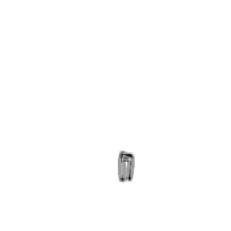

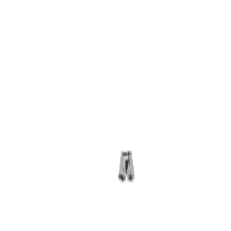

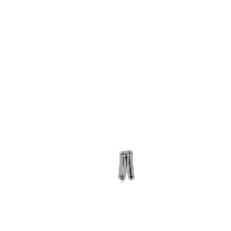

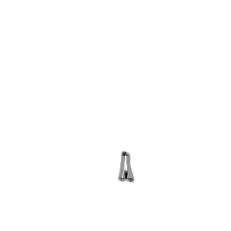

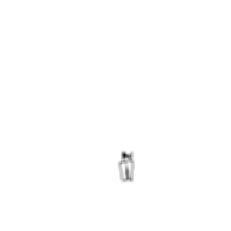

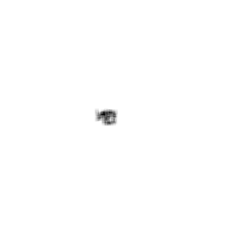

loading face drawings
load complete


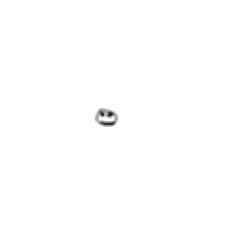

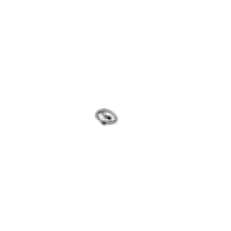

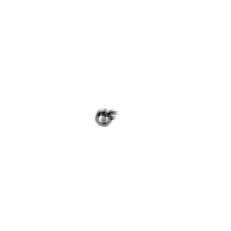

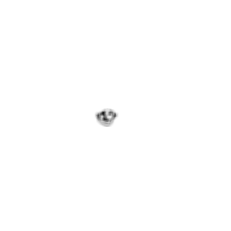

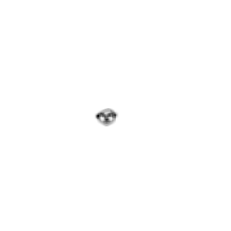

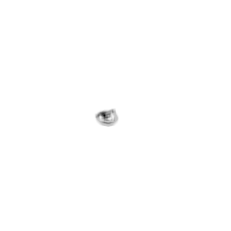

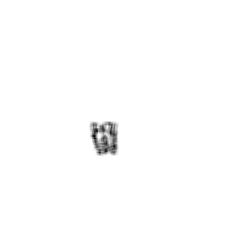

loading t-shirt drawings
load complete


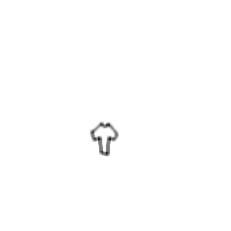

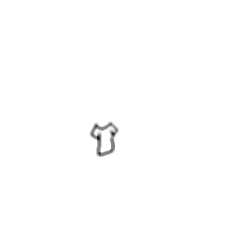

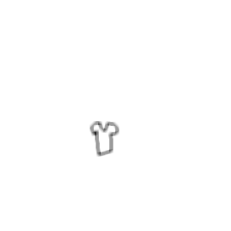

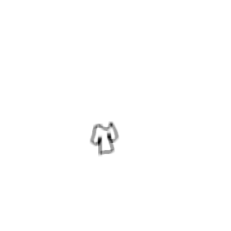

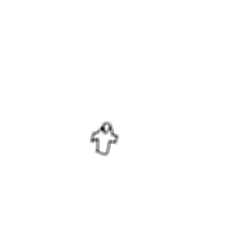

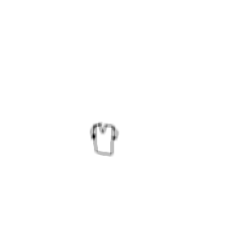

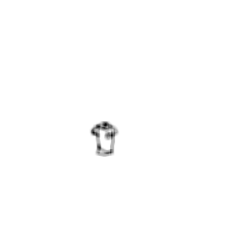

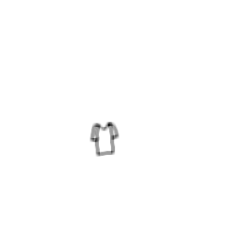

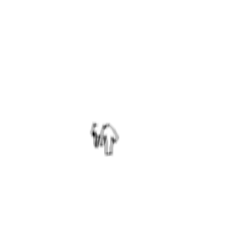

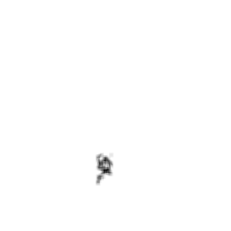

loading pants drawings
load complete


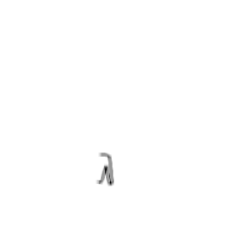

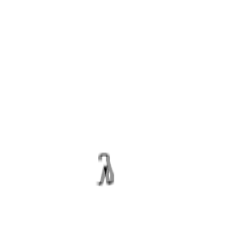

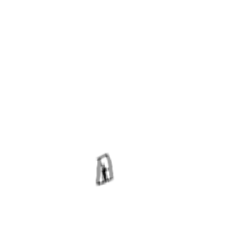

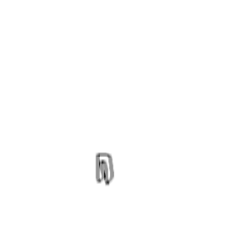

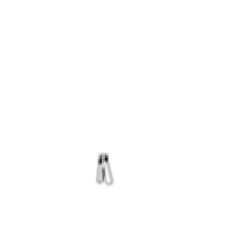

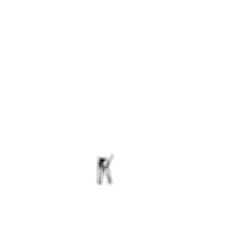

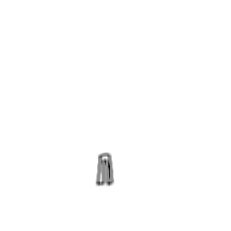

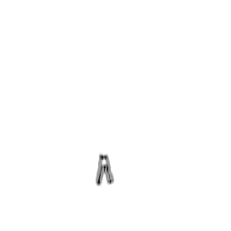

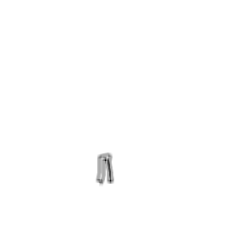

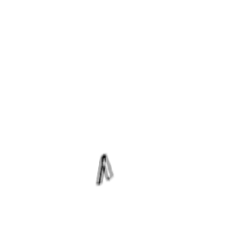

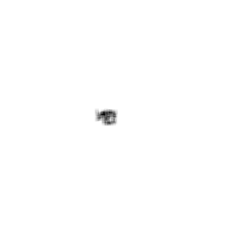

loading face drawings
load complete


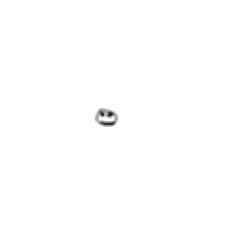

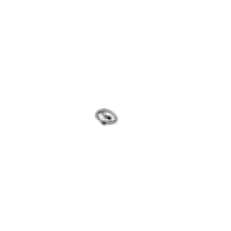

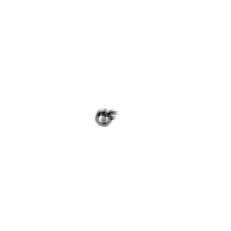

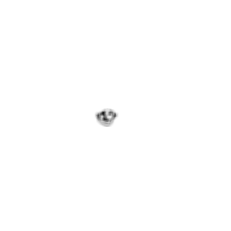

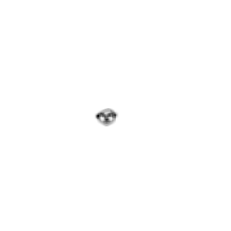

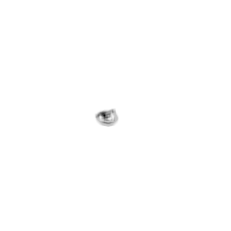

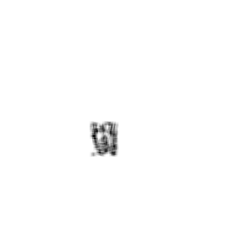

loading t-shirt drawings
load complete


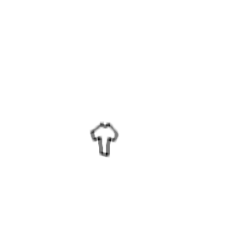

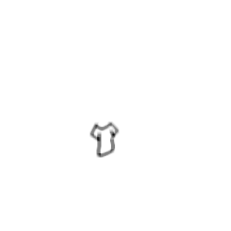

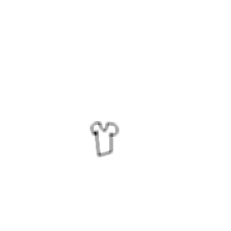

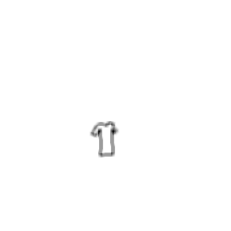

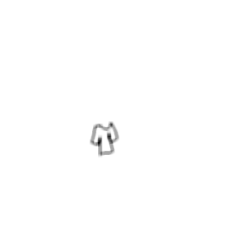

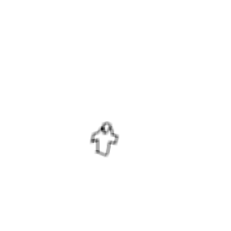

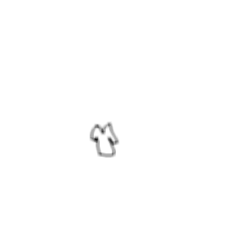

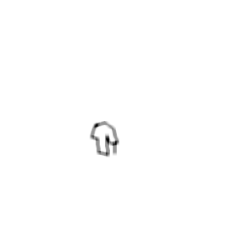

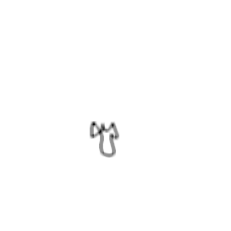

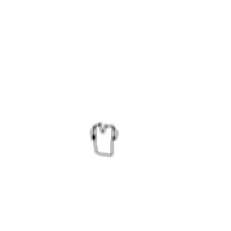

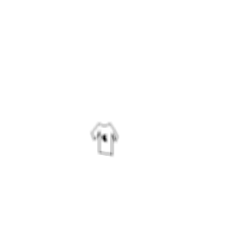

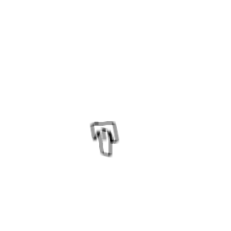

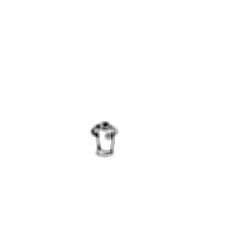

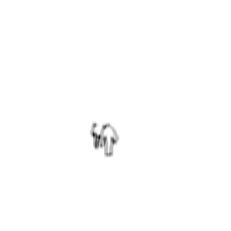

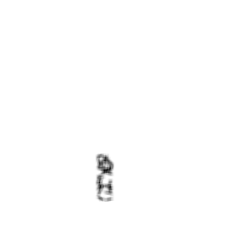

loading pants drawings
load complete


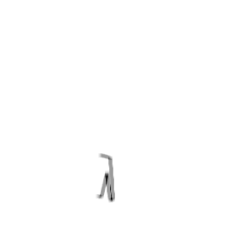

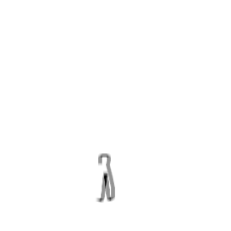

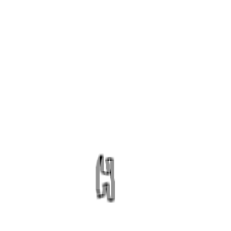

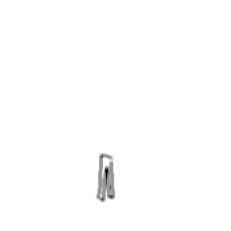

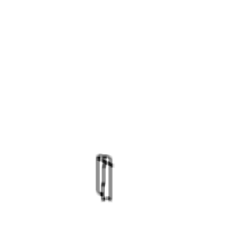

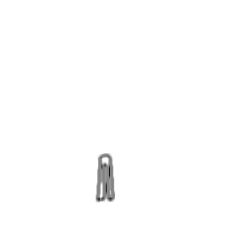

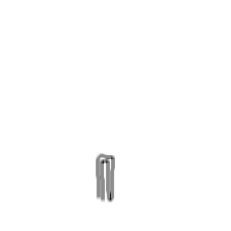

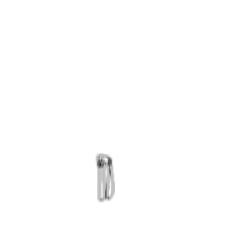

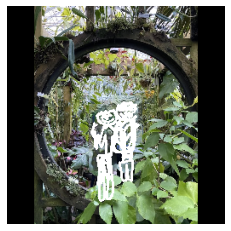

Evaluating :  IMG_1206.JPG


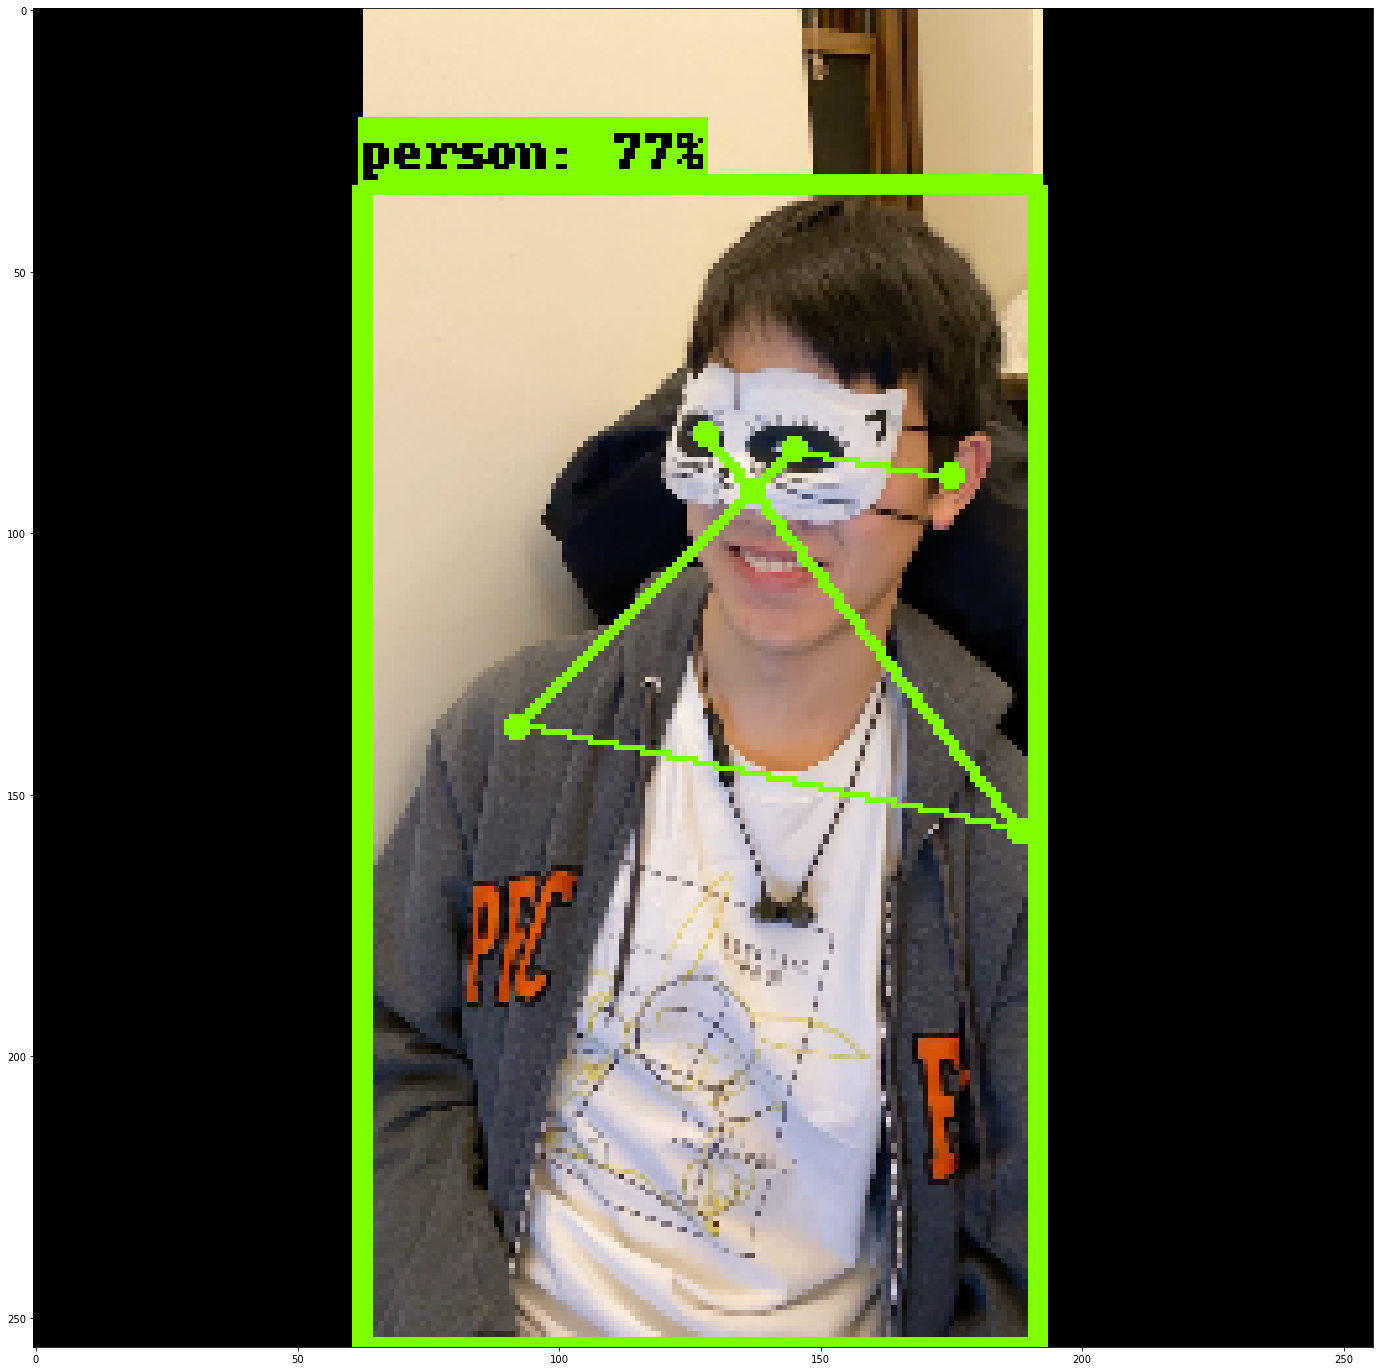

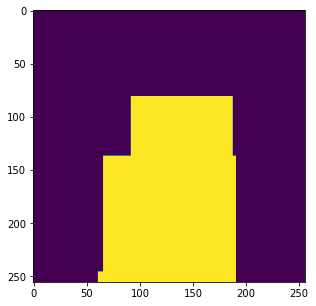

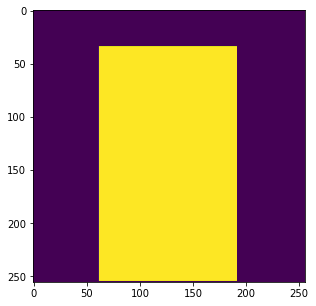

Inpainting...


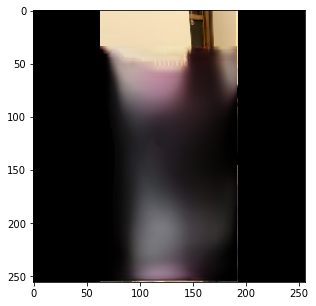

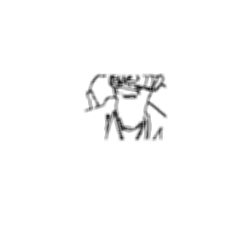

loading face drawings
load complete


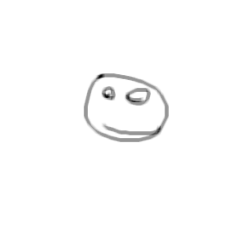

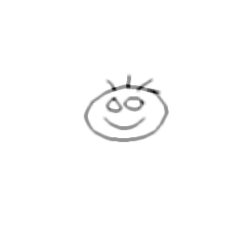

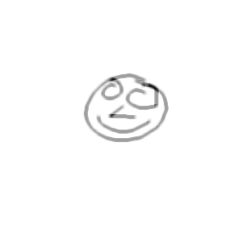

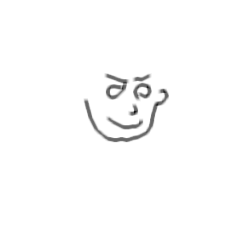

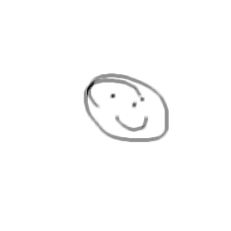

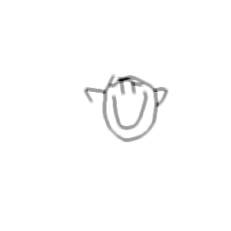

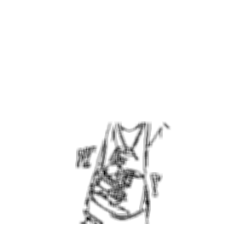

loading t-shirt drawings
load complete


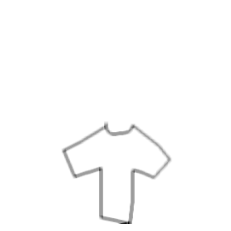

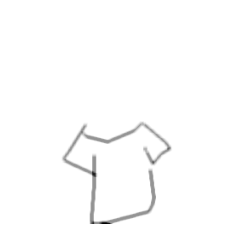

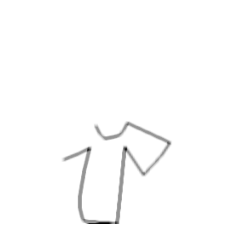

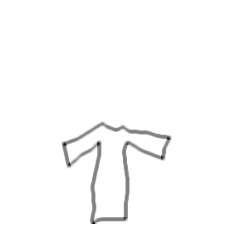

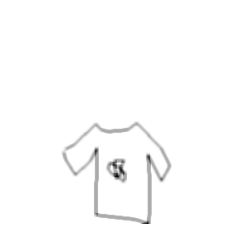

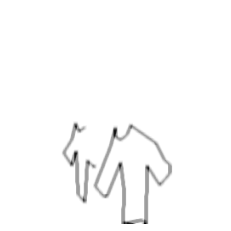

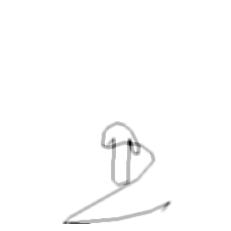

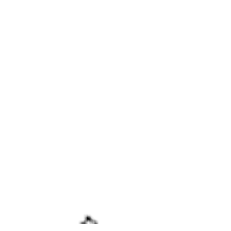

loading pants drawings
load complete


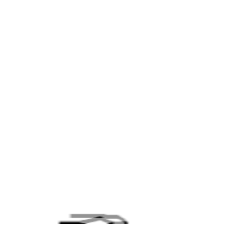

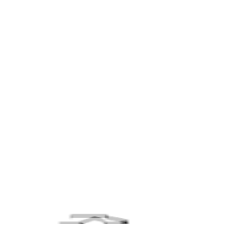

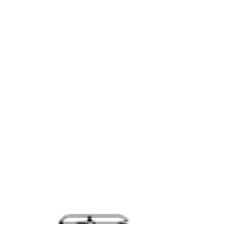

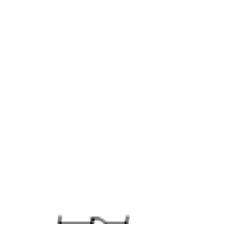

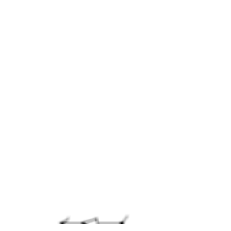

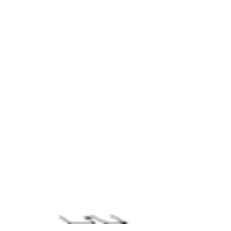

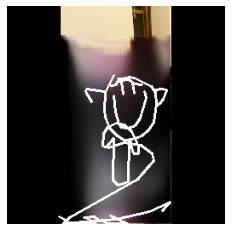

Evaluating :  000000281754.jpg


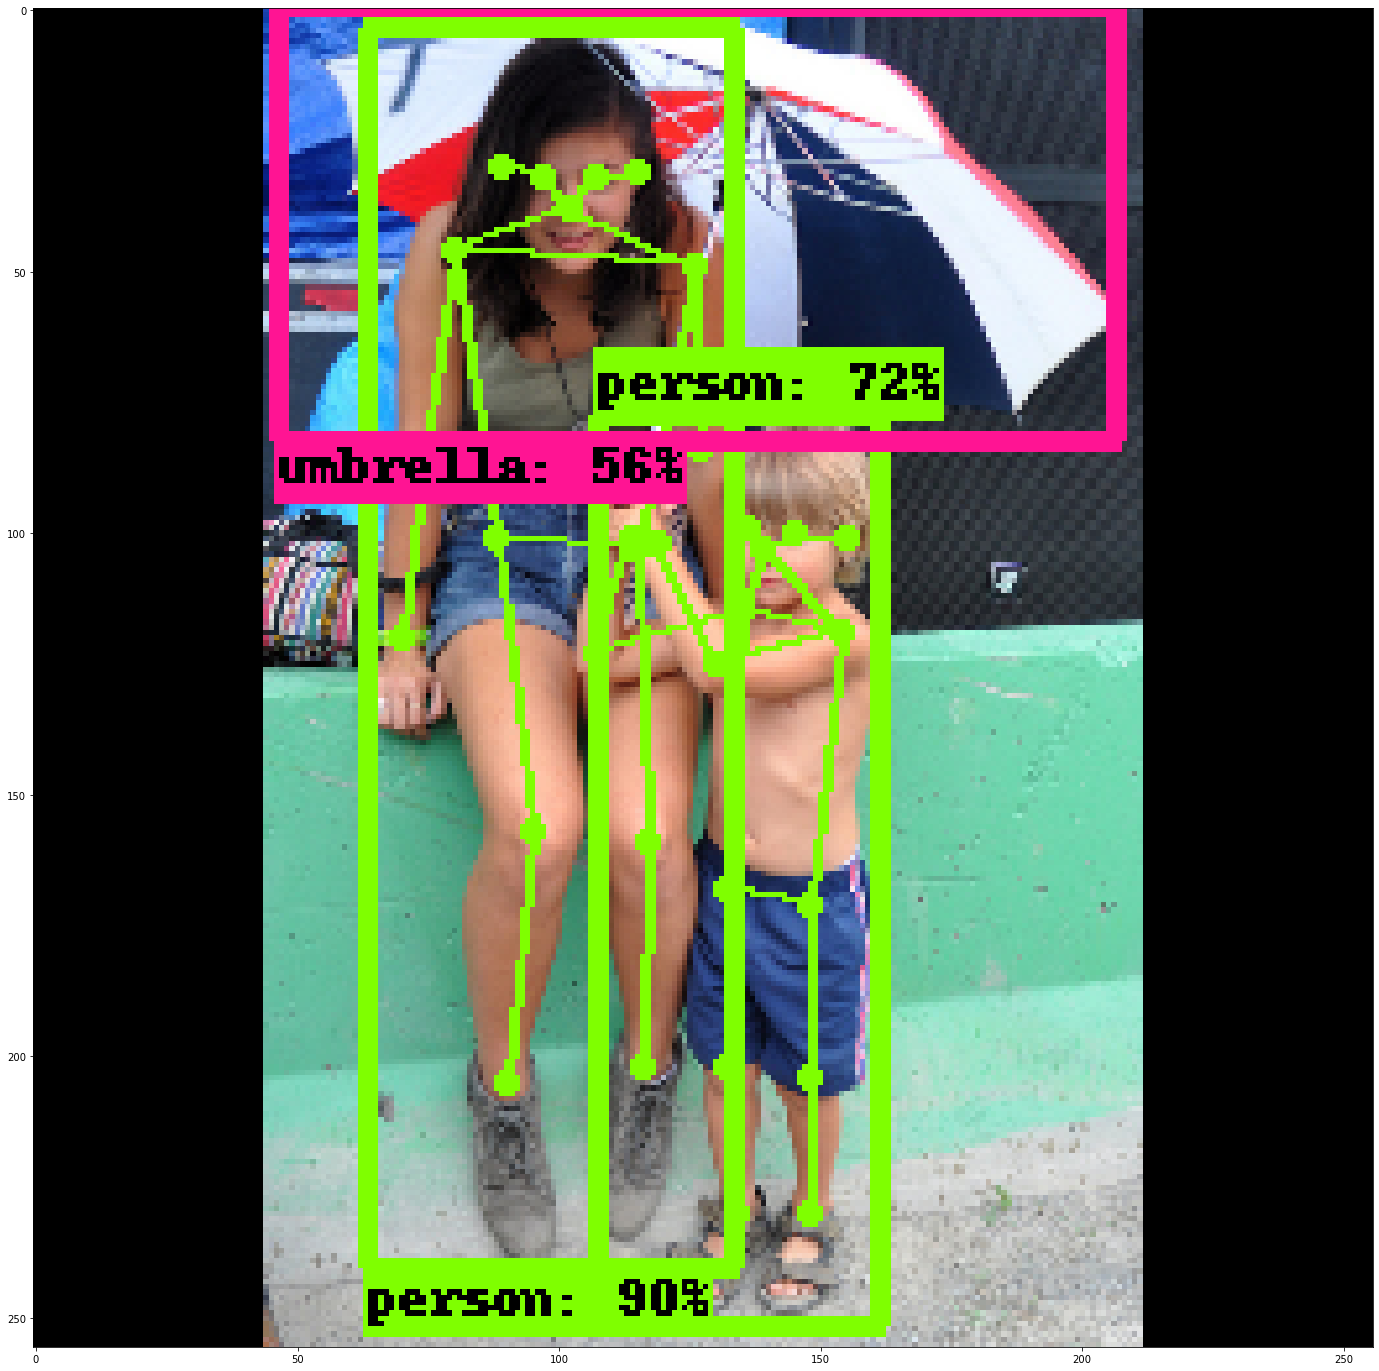

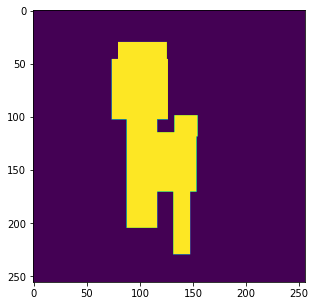

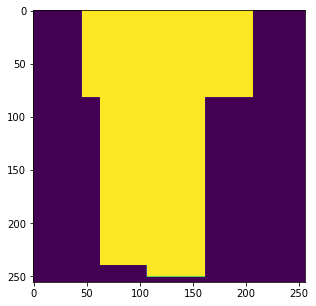

Inpainting...


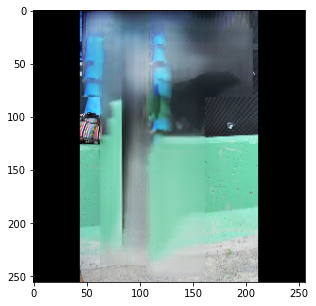

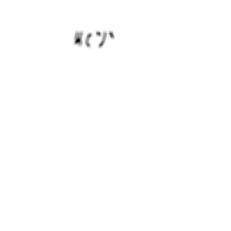

loading face drawings
load complete


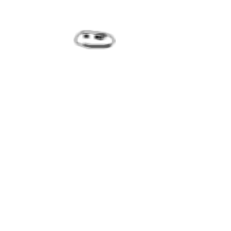

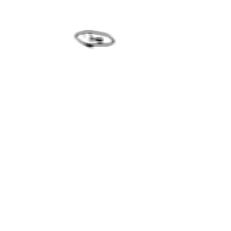

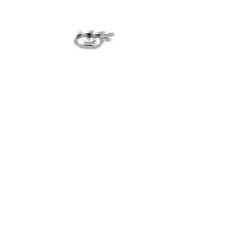

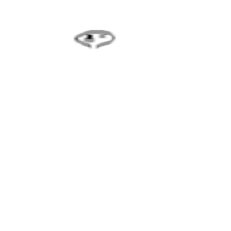

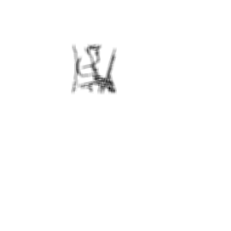

loading t-shirt drawings
load complete


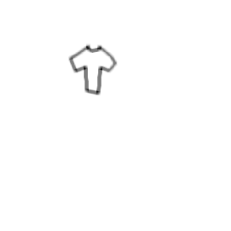

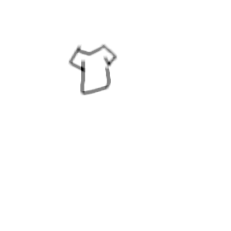

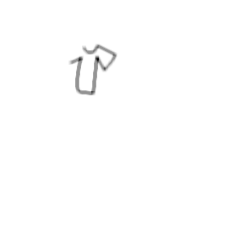

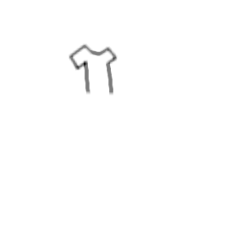

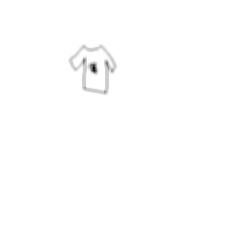

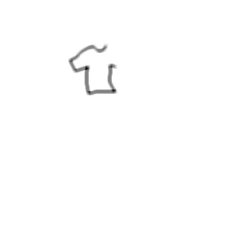

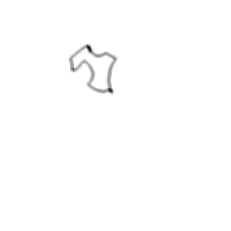

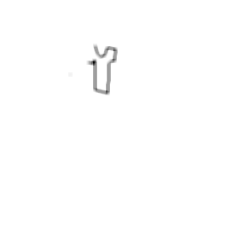

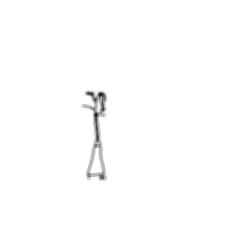

loading pants drawings
load complete


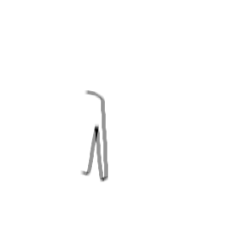

IndexError: list index out of range

In [15]:
# Runs image evaluation on image in source_path and saves results to sink_path
def evaluate(object_detection, qd_dataset, inpainting, source_path, sink_path):
    for filename in os.listdir(source_path):
        if filename.endswith(".JPG") or filename.endswith(".PNG") or filename.endswith(".jpeg") or filename.endswith(".jpg"):
            print('Evaluating : ', filename)
            image_np = load_image_into_numpy_array(os.path.join(source_path, filename))
            image_resized = resize(image_np, 256)
            
#             plt.figure(figsize=(5,5))
#             plt.imshow(image_np[0])
#             plt.show()
            
            detections = object_detection.inference(image_resized, logging=True)
#             print(detections['detection_keypoints'])
            pruned_detections, mask_detections, body_detections = qd_dataset.prune_detections(image_resized.shape, detections, threshold=0.3)
            
            _ = inpainting.create_mask(body_detections, logging=True)
            mask = inpainting.create_mask(mask_detections, logging=True)
            image_inpainted = inpainting.inpaint(image_resized, mask, logging=True)
            
#             plt.figure(figsize=(5,5))
#             plt.imshow(image_inpainted)
#             plt.show()
            
            drawn_image = qd_dataset.draw(image_inpainted,image_resized, pruned_detections, os.path.join(sink_path, filename), logging=True)
            
#             plt.figure(figsize=(5,5))
#             plt.imshow(drawn_image)
#             plt.show()
            
evaluate(object_detection, qd_dataset, inpainting, 'test_images', 'test_images_drawn')

Single Image Detection

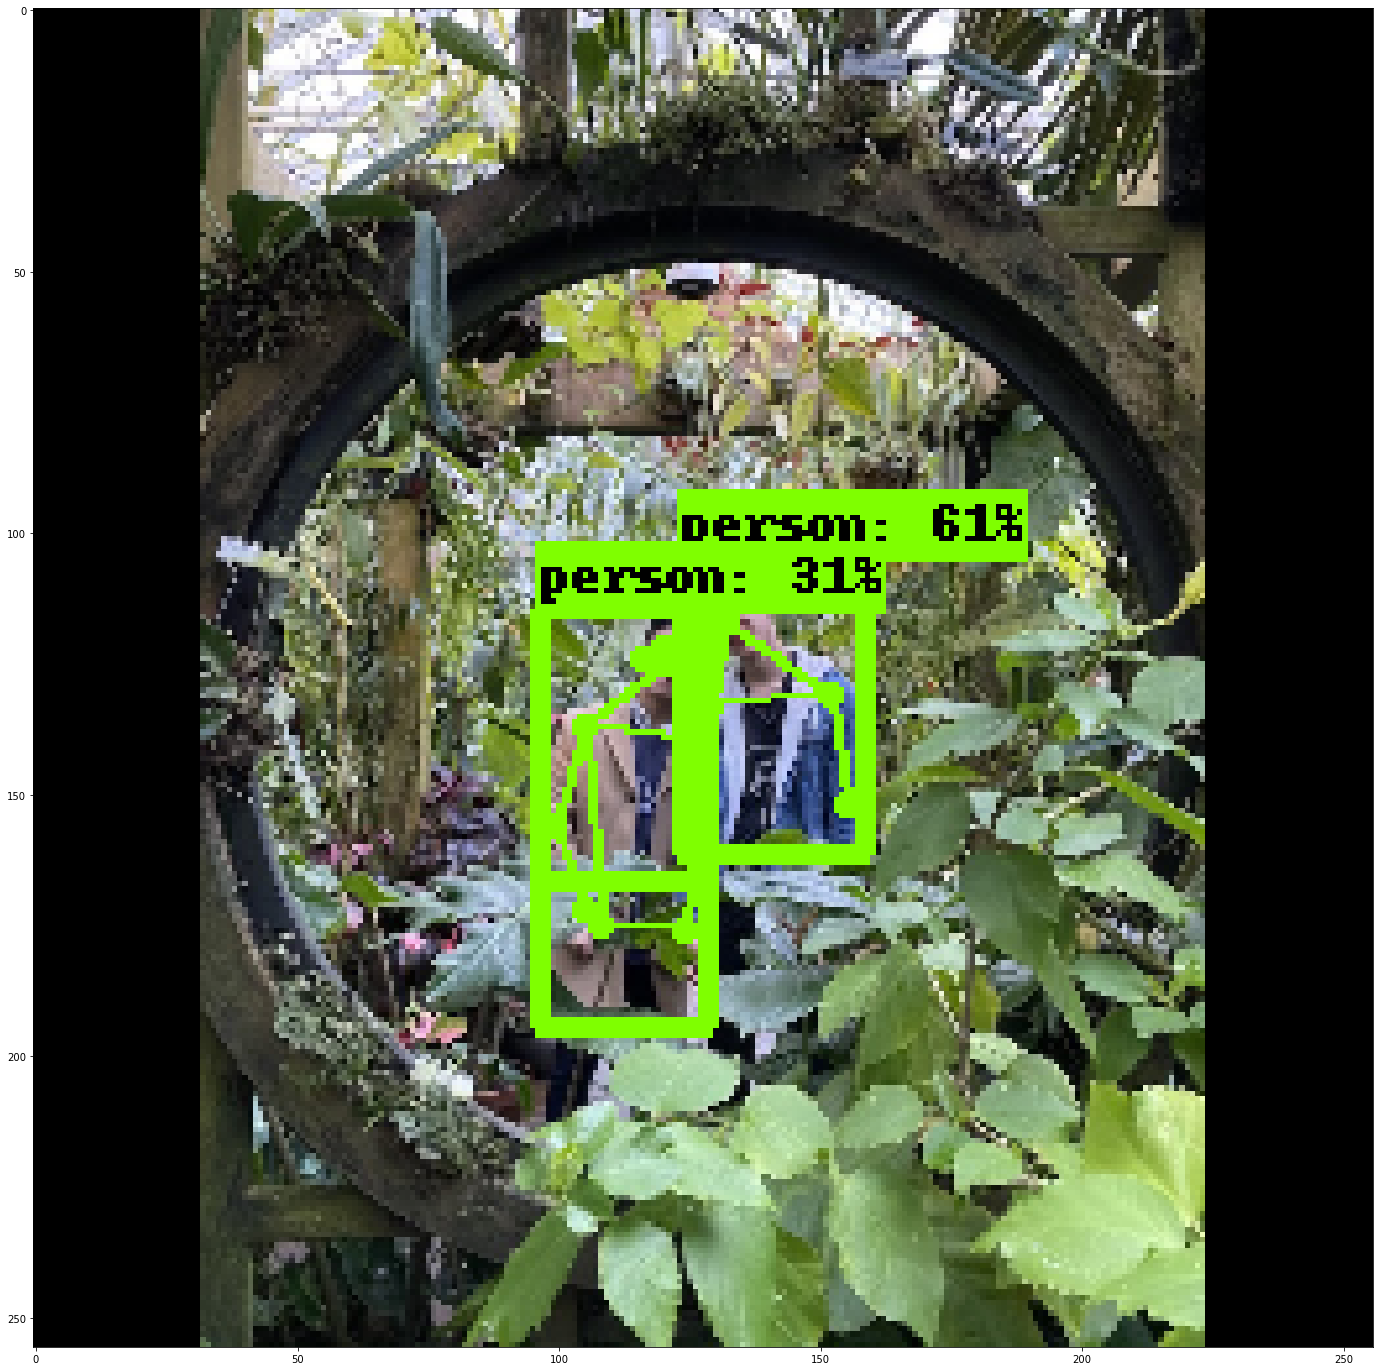

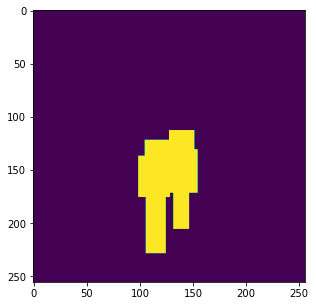

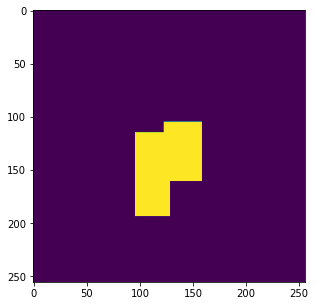

Inpainting...


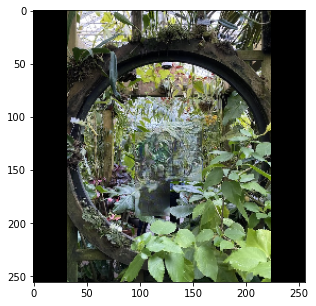

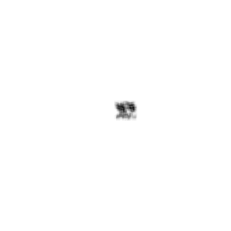

loading face drawings
load complete


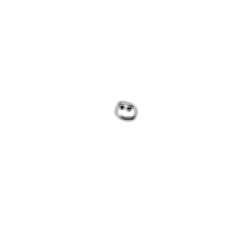

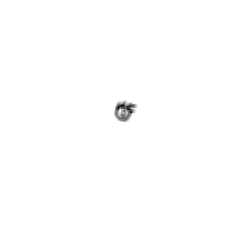

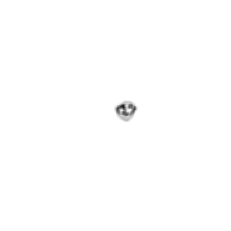

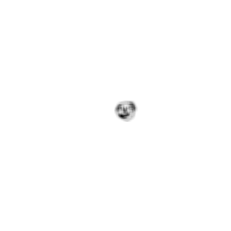

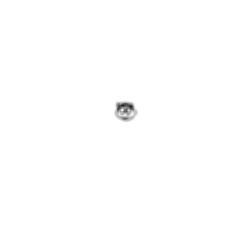

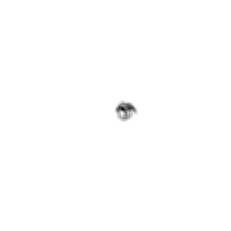

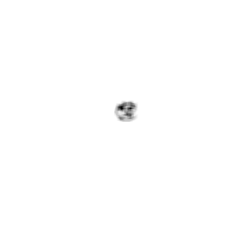

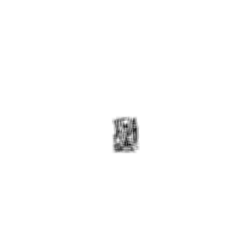

loading t-shirt drawings
load complete


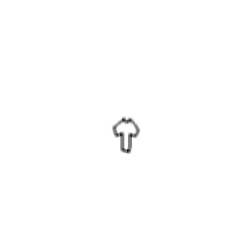

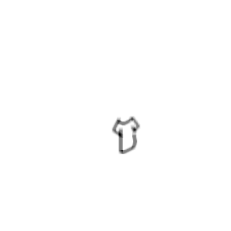

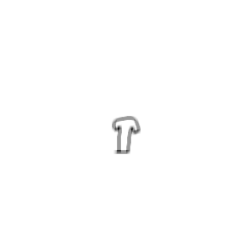

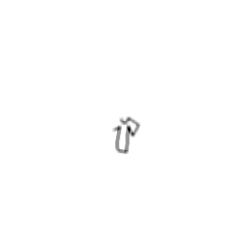

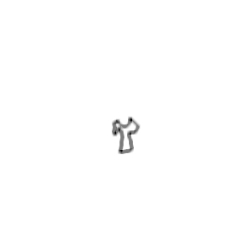

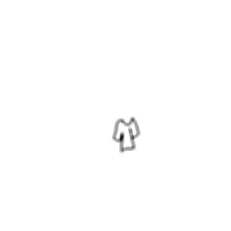

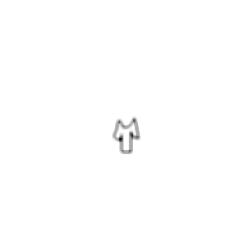

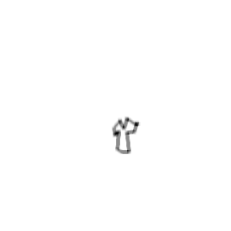

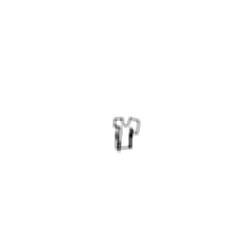

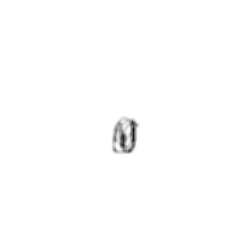

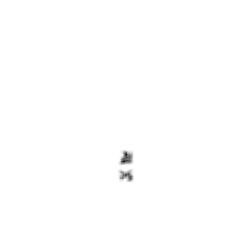

loading pants drawings
load complete


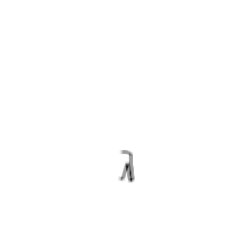

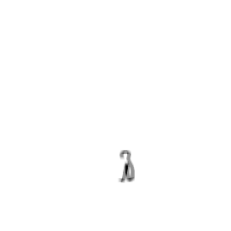

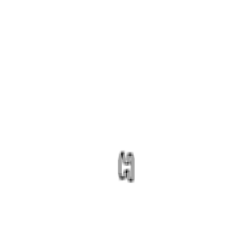

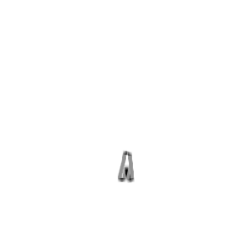

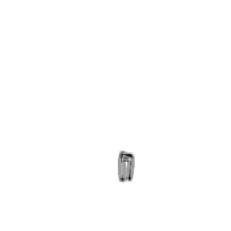

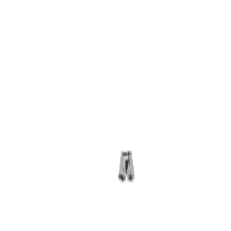

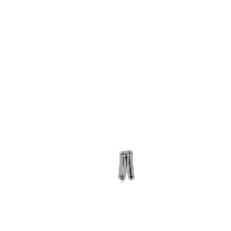

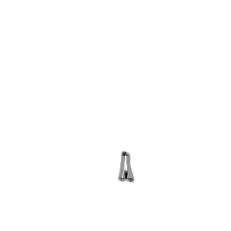

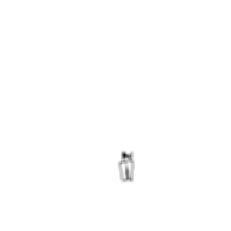

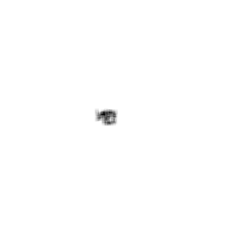

loading face drawings
load complete


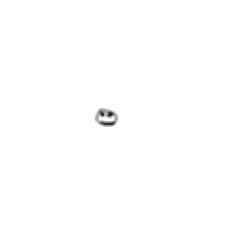

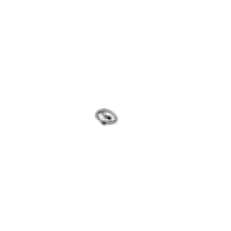

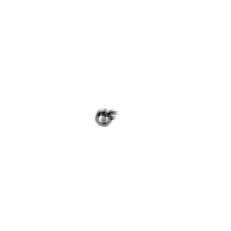

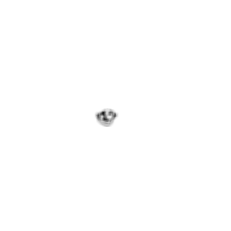

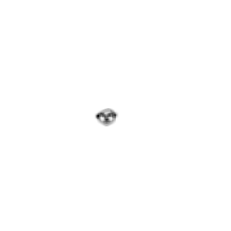

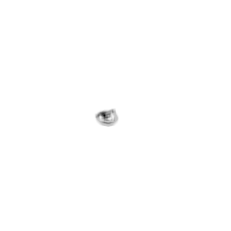

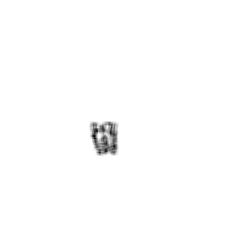

loading t-shirt drawings
load complete


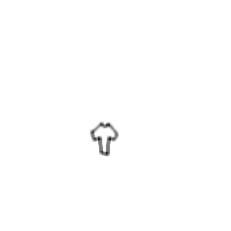

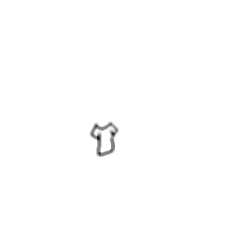

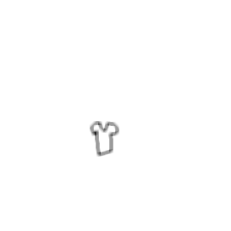

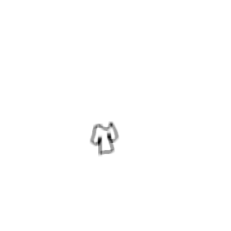

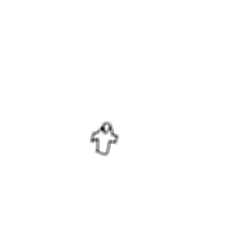

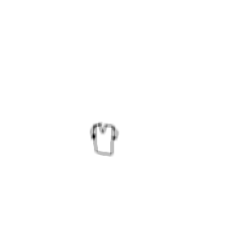

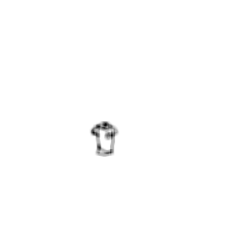

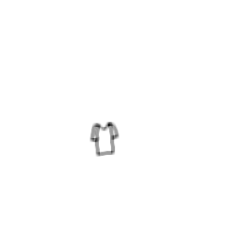

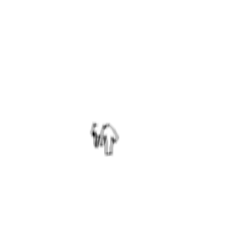

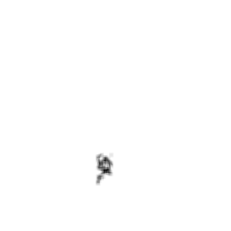

loading pants drawings
load complete


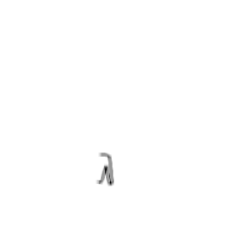

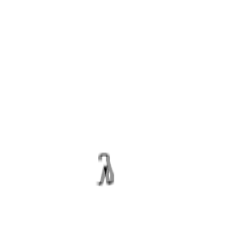

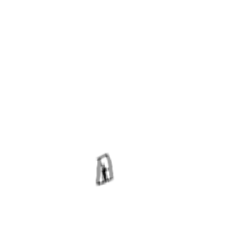

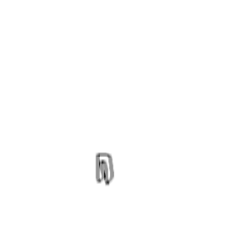

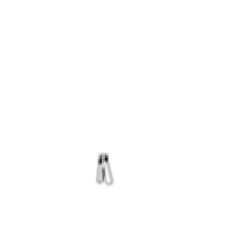

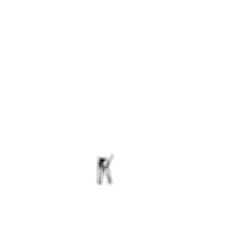

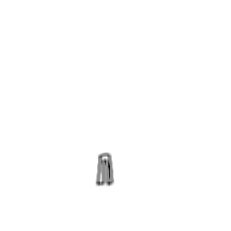

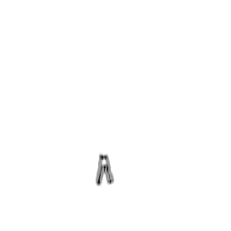

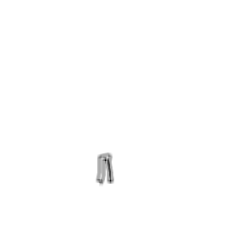

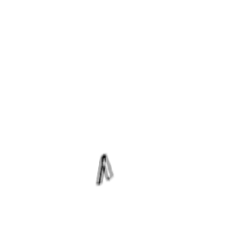

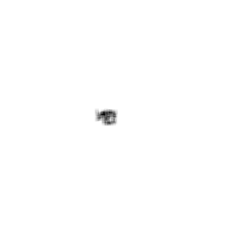

loading face drawings
load complete


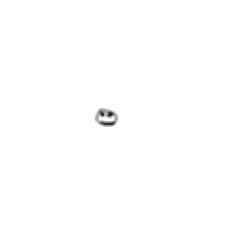

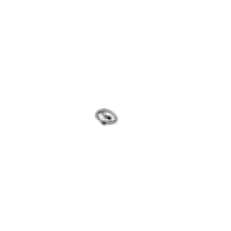

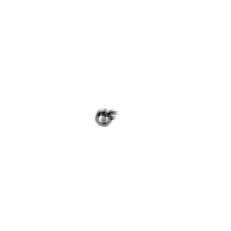

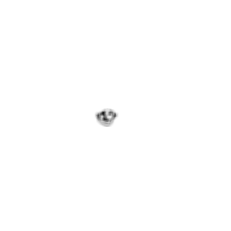

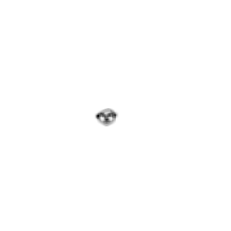

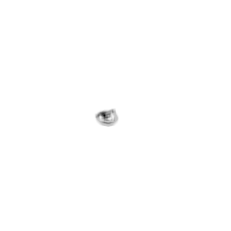

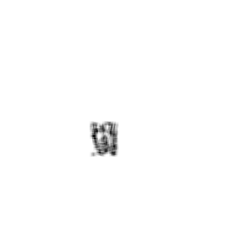

loading t-shirt drawings
load complete


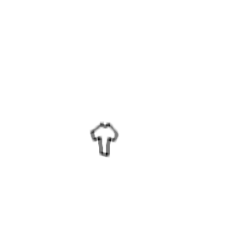

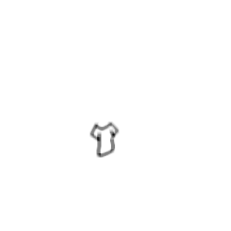

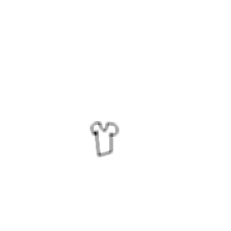

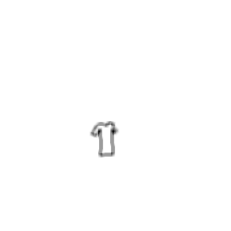

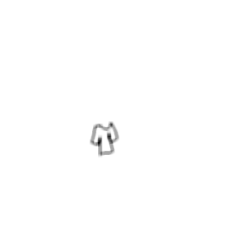

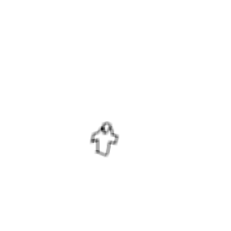

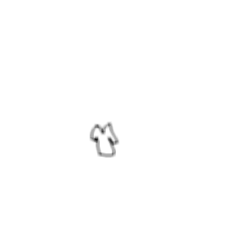

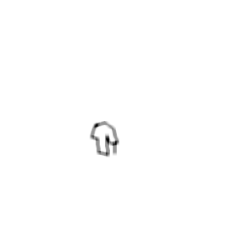

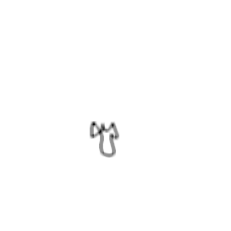

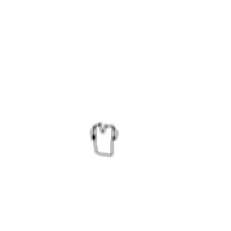

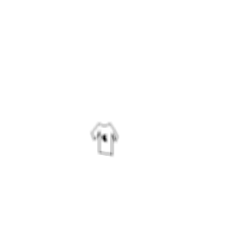

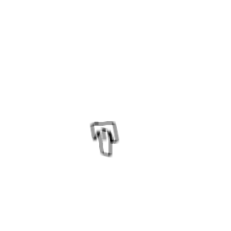

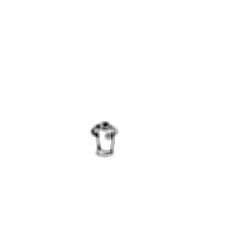

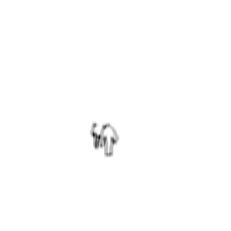

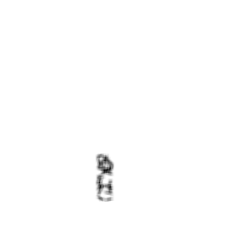

loading pants drawings
load complete


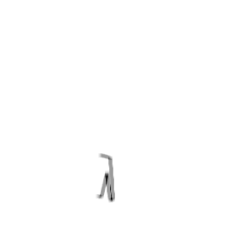

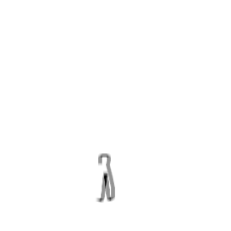

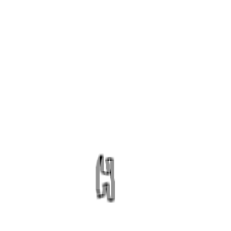

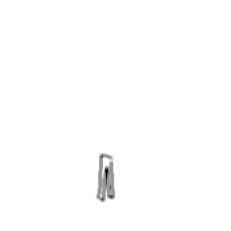

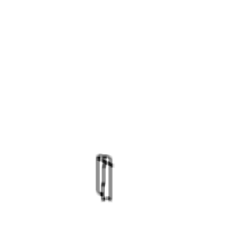

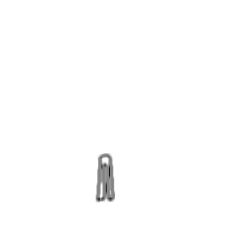

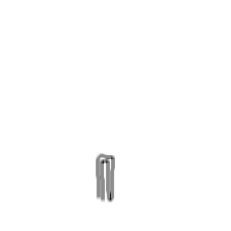

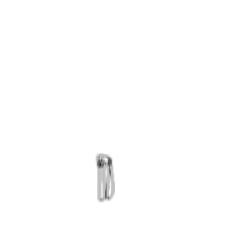

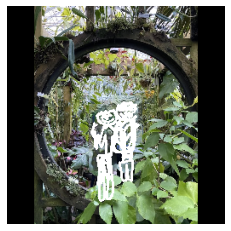

In [5]:
source_path = 'test_images'
sink_path = 'test_images_drawn'
filename = 'IMG_0969.jpeg'
image_np = load_image_into_numpy_array(os.path.join(source_path, filename))
image_resized = resize(image_np, 256)

#             plt.figure(figsize=(5,5))
#             plt.imshow(image_np[0])
#             plt.show()

detections = object_detection.inference(image_resized, logging=True)
#             print(detections['detection_keypoints'])
pruned_detections, mask_detections, body_detections = qd_dataset.prune_detections(image_resized.shape, detections, threshold=0.3)

_ = inpainting.create_mask(body_detections, logging=True)
mask = inpainting.create_mask(mask_detections, logging=True)
image_inpainted = inpainting.inpaint(image_resized, mask, logging=True)

#             plt.figure(figsize=(5,5))
#             plt.imshow(image_inpainted)
#             plt.show()

drawn_image = qd_dataset.draw(image_inpainted,image_resized, pruned_detections, os.path.join(sink_path, filename), logging=True)
            

Canny Edge Testing

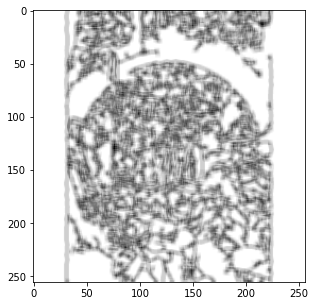

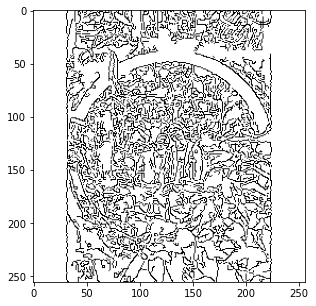

In [13]:
source_path = 'test_images'
sink_path = 'test_images_drawn'
filename = 'IMG_0969.jpeg'
# filename = 'IMG_1206.JPG'
image_np = load_image_into_numpy_array(os.path.join(source_path, filename))
image_resized = resize(image_np, 256)

image_edges = cv2.Canny(image_resized, 50, 400, apertureSize = 3, L2gradient = True)
image_edges = cv2.GaussianBlur(image_edges, (5,5),cv2.BORDER_DEFAULT)

plt.figure(figsize=(5,5))
plt.imshow(image_edges, cmap='Greys')
plt.show()

image_edges = cv2.Canny(image_resized, 50, 400, apertureSize = 3, L2gradient = False)

plt.figure(figsize=(5,5))
plt.imshow(image_edges, cmap='Greys')
plt.show()

Resized Image Testing

In [ ]:
from quickdraw import QuickDrawData
import cv2

qd = QuickDrawData()

anvil = qd.get_drawing("anvil")
anvil = anvil.image
plt.imshow(anvil)
plt.axis('off')
plt.show() 
print(np.array(anvil).shape)

anvil = cv2.resize(np.array(anvil), (38, 30))
plt.imshow(anvil)
plt.axis('off')
plt.show() 